In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import lightgbm as lgb
import optuna.integration.lightgbm as olgb

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
train_pre = pd.read_csv('../data/train_pre.csv')
test_pre = pd.read_csv('../data/test_pre.csv')

train = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')

In [4]:
train_pre.drop(columns='Unnamed: 0', inplace=True)
test_pre.drop(columns='Unnamed: 0', inplace=True)

train_pre.head()

,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,...,sex_and_position,education_and_position,age_diff_service_length,age_layer,agelayer_and_position,overtime_by_service_length,overtime_by_age,study_time_by_service_length,study_time_by_age,age_by_service_length
0,1,44,愛知県,2,1,2,1,24,2.0,0.6,...,2_1,1_1,1.760000,2,2_1,0.368000,0.209091,0.080000,0.045455,1.760000
1,2,31,奈良県,1,0,0,0,13,9.0,0.7,...,1_2,0_2,2.214286,2,2_2,0.885714,0.400000,0.642857,0.290323,2.214286
2,2,36,山口県,1,0,0,2,14,4.0,0.4,...,1_2,2_2,2.400000,2,2_2,1.126667,0.469444,0.266667,0.111111,2.400000
3,0,22,東京都,2,0,0,0,4,3.0,0.0,...,2_0,0_0,4.400000,1,1_0,1.220000,0.277273,0.600000,0.136364,4.400000
4,0,25,鹿児島県,2,0,0,1,5,3.0,0.2,...,2_0,1_0,4.166667,1,1_0,0.816667,0.196000,0.500000,0.120000,4.166667


In [5]:
target = train['salary']

In [6]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['area', 'sex_and_position', 'education_and_position', 'agelayer_and_position']

le = LabelEncoder()
for col in cat_features:
    train_pre[col] = le.fit_transform(train_pre[col])
    test_pre[col] = le.fit_transform(test_pre[col])

In [7]:
train_pre.head()

,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,...,sex_and_position,education_and_position,age_diff_service_length,age_layer,agelayer_and_position,overtime_by_service_length,overtime_by_age,study_time_by_service_length,study_time_by_age,age_by_service_length
0,1,44,24,2,1,2,1,24,2.0,0.6,...,6,6,1.760000,2,8,0.368000,0.209091,0.080000,0.045455,1.760000
1,2,31,10,1,0,0,0,13,9.0,0.7,...,2,2,2.214286,2,9,0.885714,0.400000,0.642857,0.290323,2.214286
2,2,36,14,1,0,0,2,14,4.0,0.4,...,2,12,2.400000,2,9,1.126667,0.469444,0.266667,0.111111,2.400000
3,0,22,26,2,0,0,0,4,3.0,0.0,...,5,0,4.400000,1,3,1.220000,0.277273,0.600000,0.136364,4.400000
4,0,25,46,2,0,0,1,5,3.0,0.2,...,5,5,4.166667,1,3,0.816667,0.196000,0.500000,0.120000,4.166667


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_pre, target, test_size=0.3)

x_train.shape
x_test.shape
y_train.shape
y_test.shape

(14700, 22)

(6300, 22)

(14700,)

(6300,)

In [9]:

trains = lgb.Dataset(x_train, y_train, free_raw_data=False)
valids = lgb.Dataset(x_test, y_test, reference=trains)


trains = olgb.Dataset(x_train, y_train, free_raw_data=False)
valids = olgb.Dataset(x_test, y_test, reference=trains)

In [20]:
# LightGBMのパラメータ設定
params = {'objective': 'regression',
          'metric': 'l1',
          'verbosity': -1,
          'boosting_type': 'gbdt',
          'feature_pre_filter': False,
          'lambda_l1': 3.92994872964793e-05,
          'lambda_l2': 0.0008522013002932,
          'num_leaves': 68,
          'feature_fraction': 0.88,
          'bagging_fraction': 1.0,
          'bagging_freq': 0,
          'min_child_samples': 5,
          'num_iterations': 1000,
          'early_stopping_round': 100}


# LightGBM学習
gbm = lgb.train(params,
                trains,
                num_boost_round=200,
                valid_sets=valids,
                early_stopping_rounds=100
               )

C:\Users\abcd_\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\abcd_\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 124.313
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l1: 112.855
[3]	valid_0's l1: 102.594
[4]	valid_0's l1: 93.4281
[5]	valid_0's l1: 85.3127
[6]	valid_0's l1: 78.0256
[7]	valid_0's l1: 71.5423
[8]	valid_0's l1: 65.7371
[9]	valid_0's l1: 61.4807
[10]	valid_0's l1: 56.8355
[11]	valid_0's l1: 52.7262
[12]	valid_0's l1: 49.1022
[13]	valid_0's l1: 45.8346
[14]	valid_0's l1: 42.9966
[15]	valid_0's l1: 40.4129
[16]	valid_0's l1: 38.15
[17]	valid_0's l1: 36.593
[18]	valid_0's l1: 34.7441
[19]	valid_0's l1: 33.0939
[20]	valid_0's l1: 32.0661
[21]	valid_0's l1: 31.1643
[22]	valid_0's l1: 30.0313
[23]	valid_0's l1: 29.0353
[24]	valid_0's l1: 28.4522
[25]	valid_0's l1: 27.7005
[26]	valid_0's l1: 27.031
[27]	valid_0's l1: 26.5119
[28]	valid_0's l1: 26.0056
[29]	valid_0's l1: 25.5651
[30]	valid_0's l1: 25.2134
[31]	valid_0's l1: 24.8995
[32]	valid_0's l1: 24.5957
[33]	valid_0's l1: 24.3604
[34]	valid_0's l1: 24.165
[35]	valid_0's l1: 24.0137
[36]	va

In [21]:
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)

In [22]:
y_pred

gbm_scores = calculate_scores(y_test, y_pred)
print(gbm_scores)

array([332.10210244, 342.18540557, 339.21852751, ..., 230.02425199,
       639.51611131, 470.39846008])

              R2        MAE          MSE       RMSE
scores  0.962645  22.295725  1084.856444  32.937159


,feature,importance
10,overtime,1214
9,commute,1046
2,area,943
17,overtime_by_service_length,836
18,overtime_by_age,799
1,age,772
14,age_diff_service_length,730
13,education_and_position,618
19,study_time_by_service_length,558
5,num_child,522


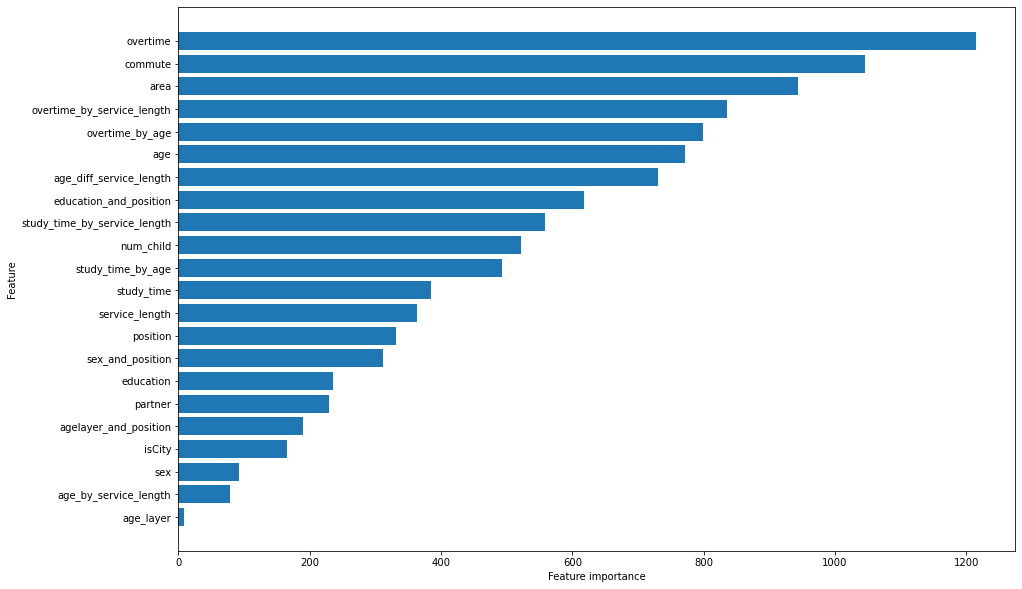

In [35]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(train_pre.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(gbm.feature_importance()) # 特徴量重要度の算出
# f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)



# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.figure(figsize=(15,10))
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル
    
    
plot_feature_importance(df_importance)

In [10]:
# optunaチューニング
params = {
        'objective': 'regression',
        'metric': 'mae',
        'verbosity': -1,
        'boosting_type': 'gbdt',
    }


best_params, history = {}, []
model = olgb.train(params,
                   trains,
                   valid_sets=valids
                  )

[I 2021-05-17 10:28:42,477] A new study created in memory with name: no-name-bf0da579-d776-47d3-817d-7afec7667594
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[1]	valid_0's l1: 124.642
[2]	valid_0's l1: 113.44
[3]	valid_0's l1: 103.491
[4]	valid_0's l1: 96.0991
[5]	valid_0's l1: 89.5194
[6]	valid_0's l1: 82.1536
[7]	valid_0's l1: 75.6444
[8]	valid_0's l1: 69.8487
[9]	valid_0's l1: 65.802
[10]	valid_0's l1: 61.0533
[11]	valid_0's l1: 56.8564
[12]	valid_0's l1: 53.2114
[13]	valid_0's l1: 49.8806
[14]	valid_0's l1: 47.6071
[15]	valid_0's l1: 44.8918
[16]	valid_0's l1: 42.4753
[17]	valid_0's l1: 40.9659
[18]	valid_0's l1: 38.9443
[19]	valid_0's l1: 37.2826
[20]	valid_0's l1: 36.2346
[21]	valid_0's l1: 35.3424
[22]	valid_0's l1: 34.0357
[23]	valid_0's l1: 32.8334
[24]	valid_0's l1: 32.22
[25]	valid_0's l1: 31.3068
[26]	valid_0's l1: 30.3754
[27]	valid_0's l1: 29.6598
[28]	valid_0's l1: 29.0178
[29]	valid_0's l1: 28.4274
[30]	valid_0's l1: 27.9798
[31]	valid_0's l1: 27.5199
[32]	valid_0's l1: 27.1274
[33]	valid_0's l1: 26.8251
[34]	valid_0's l1: 26.4915
[35]	valid_0's l1: 26.3377
[36]	valid_0's l1: 26.064
[37]	valid_0's l1: 25.85
[38]	valid_0's l1

feature_fraction, val_score: 23.805889:  14%|#4        | 1/7 [00:00<00:05,  1.08it/s]


[904]	valid_0's l1: 23.7428
[905]	valid_0's l1: 23.7438
[906]	valid_0's l1: 23.7421
[907]	valid_0's l1: 23.7453
[908]	valid_0's l1: 23.746
[909]	valid_0's l1: 23.7481
[910]	valid_0's l1: 23.7481
[911]	valid_0's l1: 23.7498
[912]	valid_0's l1: 23.7513
[913]	valid_0's l1: 23.7511
[914]	valid_0's l1: 23.7523
[915]	valid_0's l1: 23.7543
[916]	valid_0's l1: 23.7547
[917]	valid_0's l1: 23.7541
[918]	valid_0's l1: 23.7556
[919]	valid_0's l1: 23.7555
[920]	valid_0's l1: 23.7573
[921]	valid_0's l1: 23.7574
[922]	valid_0's l1: 23.7545
[923]	valid_0's l1: 23.7565
[924]	valid_0's l1: 23.7545
[925]	valid_0's l1: 23.7531
[926]	valid_0's l1: 23.7546
[927]	valid_0's l1: 23.755
[928]	valid_0's l1: 23.7566
[929]	valid_0's l1: 23.7562
[930]	valid_0's l1: 23.7589
[931]	valid_0's l1: 23.761
[932]	valid_0's l1: 23.7629
[933]	valid_0's l1: 23.7634
[934]	valid_0's l1: 23.7661
[935]	valid_0's l1: 23.7642
[936]	valid_0's l1: 23.763
[937]	valid_0's l1: 23.7626
[938]	valid_0's l1: 23.7607
[939]	valid_0's l1: 23.

feature_fraction, val_score: 23.697513:  29%|##8       | 2/7 [00:01<00:04,  1.06it/s]

[1]	valid_0's l1: 124.69
[2]	valid_0's l1: 113.518
[3]	valid_0's l1: 103.665
[4]	valid_0's l1: 96.1332
[5]	valid_0's l1: 87.9812
[6]	valid_0's l1: 80.6965
[7]	valid_0's l1: 74.2247
[8]	valid_0's l1: 68.552
[9]	valid_0's l1: 64.394
[10]	valid_0's l1: 59.7446
[11]	valid_0's l1: 55.6366
[12]	valid_0's l1: 51.9112
[13]	valid_0's l1: 48.6543
[14]	valid_0's l1: 45.7841
[15]	valid_0's l1: 43.2283
[16]	valid_0's l1: 40.993
[17]	valid_0's l1: 39.4419
[18]	valid_0's l1: 37.5364
[19]	valid_0's l1: 35.934
[20]	valid_0's l1: 34.8518
[21]	valid_0's l1: 33.9103
[22]	valid_0's l1: 32.7197
[23]	valid_0's l1: 31.6144
[24]	valid_0's l1: 31.0192
[25]	valid_0's l1: 30.2297
[26]	valid_0's l1: 29.4178
[27]	valid_0's l1: 28.7976
[28]	valid_0's l1: 28.2129
[29]	valid_0's l1: 27.6964
[30]	valid_0's l1: 27.1936
[31]	valid_0's l1: 26.8026
[32]	valid_0's l1: 26.488
[33]	valid_0's l1: 26.2338
[34]	valid_0's l1: 25.9949
[35]	valid_0's l1: 25.7975
[36]	valid_0's l1: 25.6079
[37]	valid_0's l1: 25.423
[38]	valid_0's l1

feature_fraction, val_score: 23.524746:  43%|####2     | 3/7 [00:02<00:03,  1.02it/s]


[940]	valid_0's l1: 23.4894
[941]	valid_0's l1: 23.4863
[942]	valid_0's l1: 23.4867
[943]	valid_0's l1: 23.4861
[944]	valid_0's l1: 23.4865
[945]	valid_0's l1: 23.4873
[946]	valid_0's l1: 23.4893
[947]	valid_0's l1: 23.4909
[948]	valid_0's l1: 23.4912
[949]	valid_0's l1: 23.4918
[950]	valid_0's l1: 23.4928
[951]	valid_0's l1: 23.4941
[952]	valid_0's l1: 23.4925
[953]	valid_0's l1: 23.4909
[954]	valid_0's l1: 23.4924
[955]	valid_0's l1: 23.4937
[956]	valid_0's l1: 23.496
[957]	valid_0's l1: 23.498
[958]	valid_0's l1: 23.5011
[959]	valid_0's l1: 23.5018
[960]	valid_0's l1: 23.5028
[961]	valid_0's l1: 23.5015
[962]	valid_0's l1: 23.5049
[963]	valid_0's l1: 23.5047
[964]	valid_0's l1: 23.5044
[965]	valid_0's l1: 23.508
[966]	valid_0's l1: 23.507
[967]	valid_0's l1: 23.5081
[968]	valid_0's l1: 23.5046
[969]	valid_0's l1: 23.5067
[970]	valid_0's l1: 23.5056
[971]	valid_0's l1: 23.5096
[972]	valid_0's l1: 23.5084
[973]	valid_0's l1: 23.5104
[974]	valid_0's l1: 23.5101
[975]	valid_0's l1: 23.

feature_fraction, val_score: 23.524746:  57%|#####7    | 4/7 [00:03<00:02,  1.02it/s]


[849]	valid_0's l1: 23.5152
[850]	valid_0's l1: 23.517
[851]	valid_0's l1: 23.5188
[852]	valid_0's l1: 23.5173
[853]	valid_0's l1: 23.5185
[854]	valid_0's l1: 23.5186
[855]	valid_0's l1: 23.5189
[856]	valid_0's l1: 23.5207
[857]	valid_0's l1: 23.5204
[858]	valid_0's l1: 23.522
[859]	valid_0's l1: 23.5237
[860]	valid_0's l1: 23.524
[861]	valid_0's l1: 23.5289
[862]	valid_0's l1: 23.5269
[863]	valid_0's l1: 23.5282
[864]	valid_0's l1: 23.5296
[865]	valid_0's l1: 23.5309
[866]	valid_0's l1: 23.5317
[867]	valid_0's l1: 23.5347
[868]	valid_0's l1: 23.5346
[869]	valid_0's l1: 23.536
[870]	valid_0's l1: 23.5361
[871]	valid_0's l1: 23.5369
[872]	valid_0's l1: 23.5373
[873]	valid_0's l1: 23.5374
[874]	valid_0's l1: 23.5386
[875]	valid_0's l1: 23.539
[876]	valid_0's l1: 23.5389
[877]	valid_0's l1: 23.5368
[878]	valid_0's l1: 23.5308
[879]	valid_0's l1: 23.5316
[880]	valid_0's l1: 23.5266
[881]	valid_0's l1: 23.5255
[882]	valid_0's l1: 23.5252
[883]	valid_0's l1: 23.5275
[884]	valid_0's l1: 23.5

feature_fraction, val_score: 23.524746:  71%|#######1  | 5/7 [00:05<00:02,  1.01s/it]


[961]	valid_0's l1: 23.5621
[962]	valid_0's l1: 23.5622
[963]	valid_0's l1: 23.5641
[964]	valid_0's l1: 23.5679
[965]	valid_0's l1: 23.567
[966]	valid_0's l1: 23.5682
[967]	valid_0's l1: 23.5684
[968]	valid_0's l1: 23.5673
[969]	valid_0's l1: 23.5703
[970]	valid_0's l1: 23.5726
[971]	valid_0's l1: 23.5736
[972]	valid_0's l1: 23.5751
[973]	valid_0's l1: 23.5768
[974]	valid_0's l1: 23.5786
[975]	valid_0's l1: 23.5755
[976]	valid_0's l1: 23.5771
[977]	valid_0's l1: 23.5778
[978]	valid_0's l1: 23.577
[979]	valid_0's l1: 23.5754
[980]	valid_0's l1: 23.5763
[981]	valid_0's l1: 23.5784
[982]	valid_0's l1: 23.5787
[983]	valid_0's l1: 23.5799
[984]	valid_0's l1: 23.5817
[985]	valid_0's l1: 23.5839
[986]	valid_0's l1: 23.5844
[987]	valid_0's l1: 23.5892
[988]	valid_0's l1: 23.5911
[989]	valid_0's l1: 23.5906
[990]	valid_0's l1: 23.5888
[991]	valid_0's l1: 23.5901
[992]	valid_0's l1: 23.5941
[993]	valid_0's l1: 23.5929
[994]	valid_0's l1: 23.5937
[995]	valid_0's l1: 23.5947
[996]	valid_0's l1: 2

feature_fraction, val_score: 23.524746:  86%|########5 | 6/7 [00:06<00:00,  1.00it/s]


[883]	valid_0's l1: 23.765
[884]	valid_0's l1: 23.7692
[885]	valid_0's l1: 23.7726
[886]	valid_0's l1: 23.774
[887]	valid_0's l1: 23.7749
[888]	valid_0's l1: 23.7748
[889]	valid_0's l1: 23.7776
[890]	valid_0's l1: 23.7795
[891]	valid_0's l1: 23.7809
[892]	valid_0's l1: 23.7844
[893]	valid_0's l1: 23.7852
[894]	valid_0's l1: 23.7856
[895]	valid_0's l1: 23.7847
[896]	valid_0's l1: 23.7851
[897]	valid_0's l1: 23.7852
[898]	valid_0's l1: 23.7836
[899]	valid_0's l1: 23.784
[900]	valid_0's l1: 23.786
[901]	valid_0's l1: 23.7854
[902]	valid_0's l1: 23.7879
[903]	valid_0's l1: 23.7879
[904]	valid_0's l1: 23.7917
[905]	valid_0's l1: 23.7948
[906]	valid_0's l1: 23.7969
[907]	valid_0's l1: 23.7994
[908]	valid_0's l1: 23.8012
[909]	valid_0's l1: 23.8006
[910]	valid_0's l1: 23.8031
[911]	valid_0's l1: 23.8043
[912]	valid_0's l1: 23.8023
[913]	valid_0's l1: 23.8043
[914]	valid_0's l1: 23.8083
[915]	valid_0's l1: 23.809
[916]	valid_0's l1: 23.8084
[917]	valid_0's l1: 23.8084
[918]	valid_0's l1: 23.8

  0%|          | 0/20 [00:00<?, ?it/s]


[885]	valid_0's l1: 23.5323
[886]	valid_0's l1: 23.5344
[887]	valid_0's l1: 23.535
[888]	valid_0's l1: 23.5361
[889]	valid_0's l1: 23.5368
[890]	valid_0's l1: 23.5359
[891]	valid_0's l1: 23.5387
[892]	valid_0's l1: 23.5364
[893]	valid_0's l1: 23.5342
[894]	valid_0's l1: 23.5342
[895]	valid_0's l1: 23.5341
[896]	valid_0's l1: 23.5355
[897]	valid_0's l1: 23.5398
[898]	valid_0's l1: 23.5411
[899]	valid_0's l1: 23.5454
[900]	valid_0's l1: 23.5455
[901]	valid_0's l1: 23.5455
[902]	valid_0's l1: 23.5457
[903]	valid_0's l1: 23.5455
[904]	valid_0's l1: 23.5476
[905]	valid_0's l1: 23.5457
[906]	valid_0's l1: 23.5456
[907]	valid_0's l1: 23.5469
[908]	valid_0's l1: 23.5485
[909]	valid_0's l1: 23.5489
[910]	valid_0's l1: 23.5494
[911]	valid_0's l1: 23.5509
[912]	valid_0's l1: 23.5506
[913]	valid_0's l1: 23.5547
[914]	valid_0's l1: 23.5557
[915]	valid_0's l1: 23.5578
[916]	valid_0's l1: 23.5593
[917]	valid_0's l1: 23.5571
[918]	valid_0's l1: 23.5562
[919]	valid_0's l1: 23.5573
[920]	valid_0's l1: 

num_leaves, val_score: 23.524746:   0%|          | 0/20 [00:00<?, ?it/s]

[1]	valid_0's l1: 124.284
[2]	valid_0's l1: 112.747
[3]	valid_0's l1: 102.425
[4]	valid_0's l1: 94.5837
[5]	valid_0's l1: 86.2014
[6]	valid_0's l1: 78.6968
[7]	valid_0's l1: 72.0847
[8]	valid_0's l1: 66.0804
[9]	valid_0's l1: 61.8626
[10]	valid_0's l1: 57.001
[11]	valid_0's l1: 52.8414
[12]	valid_0's l1: 49.0118
[13]	valid_0's l1: 45.6845
[14]	valid_0's l1: 42.6654
[15]	valid_0's l1: 40.0257
[16]	valid_0's l1: 37.6654
[17]	valid_0's l1: 36.1908
[18]	valid_0's l1: 34.2977
[19]	valid_0's l1: 32.6877
[20]	valid_0's l1: 31.7263
[21]	valid_0's l1: 30.8972
[22]	valid_0's l1: 29.7835
[23]	valid_0's l1: 28.8068
[24]	valid_0's l1: 28.2825
[25]	valid_0's l1: 27.548
[26]	valid_0's l1: 26.8769
[27]	valid_0's l1: 26.376
[28]	valid_0's l1: 25.8724
[29]	valid_0's l1: 25.4873
[30]	valid_0's l1: 25.1578
[31]	valid_0's l1: 24.8866
[32]	valid_0's l1: 24.6626
[33]	valid_0's l1: 24.4745
[34]	valid_0's l1: 24.3081
[35]	valid_0's l1: 24.1973
[36]	valid_0's l1: 24.0593
[37]	valid_0's l1: 23.949
[38]	valid_0's

num_leaves, val_score: 23.524746:   5%|5         | 1/20 [00:03<01:03,  3.33s/it]

[1]	valid_0's l1: 124.397
[2]	valid_0's l1: 112.975
[3]	valid_0's l1: 102.742
[4]	valid_0's l1: 95.0798
[5]	valid_0's l1: 86.7984
[6]	valid_0's l1: 79.4
[7]	valid_0's l1: 72.82
[8]	valid_0's l1: 66.9812
[9]	valid_0's l1: 62.8251
[10]	valid_0's l1: 58.1104
[11]	valid_0's l1: 53.9413
[12]	valid_0's l1: 50.2693
[13]	valid_0's l1: 46.9838
[14]	valid_0's l1: 44.06
[15]	valid_0's l1: 41.4633
[16]	valid_0's l1: 39.1624
[17]	valid_0's l1: 37.6633
[18]	valid_0's l1: 35.7856
[19]	valid_0's l1: 34.1901
[20]	valid_0's l1: 33.1998
[21]	valid_0's l1: 32.3084
[22]	valid_0's l1: 31.1373
[23]	valid_0's l1: 30.0757
[24]	valid_0's l1: 29.5089
[25]	valid_0's l1: 28.7314
[26]	valid_0's l1: 27.9774
[27]	valid_0's l1: 27.4273
[28]	valid_0's l1: 26.8954
[29]	valid_0's l1: 26.4542
[30]	valid_0's l1: 26.1195
[31]	valid_0's l1: 25.7406
[32]	valid_0's l1: 25.417
[33]	valid_0's l1: 25.1925
[34]	valid_0's l1: 24.9715
[35]	valid_0's l1: 24.8037
[36]	valid_0's l1: 24.6687
[37]	valid_0's l1: 24.5374
[38]	valid_0's l1:

num_leaves, val_score: 23.524746:  10%|#         | 2/20 [00:04<00:50,  2.82s/it]

[1]	valid_0's l1: 124.283
[2]	valid_0's l1: 112.75
[3]	valid_0's l1: 102.432
[4]	valid_0's l1: 94.5911
[5]	valid_0's l1: 86.2183
[6]	valid_0's l1: 78.7117
[7]	valid_0's l1: 72.0945
[8]	valid_0's l1: 66.0996
[9]	valid_0's l1: 61.9064
[10]	valid_0's l1: 57.0371
[11]	valid_0's l1: 52.8684
[12]	valid_0's l1: 49.0453
[13]	valid_0's l1: 45.7053
[14]	valid_0's l1: 42.6812
[15]	valid_0's l1: 40.0768
[16]	valid_0's l1: 37.7567
[17]	valid_0's l1: 36.2781
[18]	valid_0's l1: 34.3817
[19]	valid_0's l1: 32.79
[20]	valid_0's l1: 31.8362
[21]	valid_0's l1: 31.0052
[22]	valid_0's l1: 29.8633
[23]	valid_0's l1: 28.854
[24]	valid_0's l1: 28.353
[25]	valid_0's l1: 27.6216
[26]	valid_0's l1: 26.9988
[27]	valid_0's l1: 26.501
[28]	valid_0's l1: 26.0156
[29]	valid_0's l1: 25.5753
[30]	valid_0's l1: 25.2648
[31]	valid_0's l1: 24.9816
[32]	valid_0's l1: 24.7473
[33]	valid_0's l1: 24.5755
[34]	valid_0's l1: 24.3851
[35]	valid_0's l1: 24.2622
[36]	valid_0's l1: 24.1049
[37]	valid_0's l1: 23.9848
[38]	valid_0's l

num_leaves, val_score: 23.524746:  15%|#5        | 3/20 [00:08<00:49,  2.94s/it]

[1]	valid_0's l1: 124.87
[2]	valid_0's l1: 113.813
[3]	valid_0's l1: 103.955
[4]	valid_0's l1: 96.409
[5]	valid_0's l1: 88.2984
[6]	valid_0's l1: 81.0596
[7]	valid_0's l1: 74.6311
[8]	valid_0's l1: 69.0394
[9]	valid_0's l1: 64.8755
[10]	valid_0's l1: 60.2986
[11]	valid_0's l1: 56.2081
[12]	valid_0's l1: 52.5795
[13]	valid_0's l1: 49.3524
[14]	valid_0's l1: 46.4889
[15]	valid_0's l1: 43.9966
[16]	valid_0's l1: 41.7358
[17]	valid_0's l1: 40.2256
[18]	valid_0's l1: 38.397
[19]	valid_0's l1: 36.702
[20]	valid_0's l1: 35.6055
[21]	valid_0's l1: 34.6847
[22]	valid_0's l1: 33.4558
[23]	valid_0's l1: 32.3275
[24]	valid_0's l1: 31.6924
[25]	valid_0's l1: 30.8499
[26]	valid_0's l1: 30.097
[27]	valid_0's l1: 29.4823
[28]	valid_0's l1: 28.8739
[29]	valid_0's l1: 28.2911
[30]	valid_0's l1: 27.8377
[31]	valid_0's l1: 27.4869
[32]	valid_0's l1: 27.174
[33]	valid_0's l1: 26.8959
[34]	valid_0's l1: 26.5955
[35]	valid_0's l1: 26.4052
[36]	valid_0's l1: 26.1391
[37]	valid_0's l1: 25.9662
[38]	valid_0's l

num_leaves, val_score: 23.524746:  20%|##        | 4/20 [00:09<00:37,  2.35s/it]

[1]	valid_0's l1: 124.612
[2]	valid_0's l1: 113.332
[3]	valid_0's l1: 103.412
[4]	valid_0's l1: 95.7935
[5]	valid_0's l1: 87.6776
[6]	valid_0's l1: 80.3925
[7]	valid_0's l1: 73.8987
[8]	valid_0's l1: 68.1736
[9]	valid_0's l1: 64.0356
[10]	valid_0's l1: 59.3944
[11]	valid_0's l1: 55.3031
[12]	valid_0's l1: 51.6137
[13]	valid_0's l1: 48.3547
[14]	valid_0's l1: 45.4148
[15]	valid_0's l1: 42.8662
[16]	valid_0's l1: 40.5921
[17]	valid_0's l1: 39.0792
[18]	valid_0's l1: 37.2071
[19]	valid_0's l1: 35.5781
[20]	valid_0's l1: 34.518
[21]	valid_0's l1: 33.5622
[22]	valid_0's l1: 32.3546
[23]	valid_0's l1: 31.2414
[24]	valid_0's l1: 30.6112
[25]	valid_0's l1: 29.8013
[26]	valid_0's l1: 29
[27]	valid_0's l1: 28.3988
[28]	valid_0's l1: 27.8166
[29]	valid_0's l1: 27.3462
[30]	valid_0's l1: 26.8883
[31]	valid_0's l1: 26.5087
[32]	valid_0's l1: 26.1913
[33]	valid_0's l1: 25.9251
[34]	valid_0's l1: 25.6278
[35]	valid_0's l1: 25.4126
[36]	valid_0's l1: 25.2031
[37]	valid_0's l1: 25.062
[38]	valid_0's l1

num_leaves, val_score: 23.524746:  25%|##5       | 5/20 [00:10<00:30,  2.00s/it]

[1]	valid_0's l1: 124.42
[2]	valid_0's l1: 113.003
[3]	valid_0's l1: 102.777
[4]	valid_0's l1: 95.0933
[5]	valid_0's l1: 86.8278
[6]	valid_0's l1: 79.4463
[7]	valid_0's l1: 72.8829
[8]	valid_0's l1: 67.0241
[9]	valid_0's l1: 62.8832
[10]	valid_0's l1: 58.1552
[11]	valid_0's l1: 54.0477
[12]	valid_0's l1: 50.3869
[13]	valid_0's l1: 47.1017
[14]	valid_0's l1: 44.1336
[15]	valid_0's l1: 41.5588
[16]	valid_0's l1: 39.2609
[17]	valid_0's l1: 37.7546
[18]	valid_0's l1: 35.8438
[19]	valid_0's l1: 34.2236
[20]	valid_0's l1: 33.2304
[21]	valid_0's l1: 32.3431
[22]	valid_0's l1: 31.1823
[23]	valid_0's l1: 30.1102
[24]	valid_0's l1: 29.534
[25]	valid_0's l1: 28.7676
[26]	valid_0's l1: 27.9911
[27]	valid_0's l1: 27.4004
[28]	valid_0's l1: 26.8727
[29]	valid_0's l1: 26.4384
[30]	valid_0's l1: 26.0635
[31]	valid_0's l1: 25.6679
[32]	valid_0's l1: 25.3559
[33]	valid_0's l1: 25.1175
[34]	valid_0's l1: 24.8995
[35]	valid_0's l1: 24.7436
[36]	valid_0's l1: 24.52
[37]	valid_0's l1: 24.3598
[38]	valid_0's

num_leaves, val_score: 23.524746:  30%|###       | 6/20 [00:11<00:25,  1.85s/it]


[946]	valid_0's l1: 23.8878
[947]	valid_0's l1: 23.8898
[948]	valid_0's l1: 23.89
[949]	valid_0's l1: 23.8907
[950]	valid_0's l1: 23.8909
[951]	valid_0's l1: 23.8921
[952]	valid_0's l1: 23.8905
[953]	valid_0's l1: 23.8905
[954]	valid_0's l1: 23.8945
[955]	valid_0's l1: 23.8946
[956]	valid_0's l1: 23.8959
[957]	valid_0's l1: 23.8978
[958]	valid_0's l1: 23.8997
[959]	valid_0's l1: 23.9001
[960]	valid_0's l1: 23.9001
[961]	valid_0's l1: 23.9022
[962]	valid_0's l1: 23.9045
[963]	valid_0's l1: 23.9023
[964]	valid_0's l1: 23.9032
[965]	valid_0's l1: 23.9045
[966]	valid_0's l1: 23.9062
[967]	valid_0's l1: 23.9056
[968]	valid_0's l1: 23.9067
[969]	valid_0's l1: 23.9089
[970]	valid_0's l1: 23.9117
[971]	valid_0's l1: 23.9115
[972]	valid_0's l1: 23.9121
[973]	valid_0's l1: 23.912
[974]	valid_0's l1: 23.9125
[975]	valid_0's l1: 23.9146
[976]	valid_0's l1: 23.915
[977]	valid_0's l1: 23.9148
[978]	valid_0's l1: 23.9143
[979]	valid_0's l1: 23.9149
[980]	valid_0's l1: 23.9142
[981]	valid_0's l1: 23.

[I 2021-05-17 10:29:01,309] Trial 12 finished with value: 23.933217537762665 and parameters: {'num_leaves': 58}. Best is trial 10 with value: 23.647115493194566.
num_leaves, val_score: 23.524746:  30%|###       | 6/20 [00:11<00:25,  1.85s/it]

[1]	valid_0's l1: 124.276
[2]	valid_0's l1: 112.728
[3]	valid_0's l1: 102.409
[4]	valid_0's l1: 94.5786
[5]	valid_0's l1: 86.1986
[6]	valid_0's l1: 78.6771
[7]	valid_0's l1: 72.0811
[8]	valid_0's l1: 66.068
[9]	valid_0's l1: 61.8549
[10]	valid_0's l1: 56.9722
[11]	valid_0's l1: 52.7843
[12]	valid_0's l1: 49.0104
[13]	valid_0's l1: 45.6397
[14]	valid_0's l1: 42.6361
[15]	valid_0's l1: 40.0211
[16]	valid_0's l1: 37.7386
[17]	valid_0's l1: 36.2352
[18]	valid_0's l1: 34.3595
[19]	valid_0's l1: 32.7342
[20]	valid_0's l1: 31.7764
[21]	valid_0's l1: 30.9518
[22]	valid_0's l1: 29.8348
[23]	valid_0's l1: 28.8419
[24]	valid_0's l1: 28.3412
[25]	valid_0's l1: 27.6238
[26]	valid_0's l1: 26.9737
[27]	valid_0's l1: 26.4741
[28]	valid_0's l1: 26.0018
[29]	valid_0's l1: 25.5857
[30]	valid_0's l1: 25.2906
[31]	valid_0's l1: 24.9907
[32]	valid_0's l1: 24.7603
[33]	valid_0's l1: 24.5746
[34]	valid_0's l1: 24.3673
[35]	valid_0's l1: 24.2148
[36]	valid_0's l1: 24.0796
[37]	valid_0's l1: 23.9689
[38]	valid_

num_leaves, val_score: 23.524746:  35%|###5      | 7/20 [00:15<00:30,  2.34s/it]

[1]	valid_0's l1: 126.572
[2]	valid_0's l1: 116.95
[3]	valid_0's l1: 108.862
[4]	valid_0's l1: 103.157
[5]	valid_0's l1: 96.6288
[6]	valid_0's l1: 91.0597
[7]	valid_0's l1: 86.2924
[8]	valid_0's l1: 81.5264
[9]	valid_0's l1: 78.5277
[10]	valid_0's l1: 75.0773
[11]	valid_0's l1: 72.0106
[12]	valid_0's l1: 69.1339
[13]	valid_0's l1: 66.719
[14]	valid_0's l1: 64.5207
[15]	valid_0's l1: 62.7825
[16]	valid_0's l1: 61.2313
[17]	valid_0's l1: 59.9787
[18]	valid_0's l1: 58.1621
[19]	valid_0's l1: 56.5118
[20]	valid_0's l1: 55.0467
[21]	valid_0's l1: 53.9316
[22]	valid_0's l1: 52.7693
[23]	valid_0's l1: 51.7468
[24]	valid_0's l1: 50.6149
[25]	valid_0's l1: 49.8204
[26]	valid_0's l1: 48.8815
[27]	valid_0's l1: 48.1996
[28]	valid_0's l1: 47.5059
[29]	valid_0's l1: 46.7347
[30]	valid_0's l1: 45.9469
[31]	valid_0's l1: 45.3939
[32]	valid_0's l1: 44.7153
[33]	valid_0's l1: 44.2619
[34]	valid_0's l1: 43.7376
[35]	valid_0's l1: 43.2487
[36]	valid_0's l1: 42.7833
[37]	valid_0's l1: 42.3479
[38]	valid_0

num_leaves, val_score: 23.524746:  40%|####      | 8/20 [00:15<00:21,  1.80s/it]


[774]	valid_0's l1: 27.97
[775]	valid_0's l1: 27.9701
[776]	valid_0's l1: 27.9678
[777]	valid_0's l1: 27.9558
[778]	valid_0's l1: 27.9472
[779]	valid_0's l1: 27.9587
[780]	valid_0's l1: 27.9598
[781]	valid_0's l1: 27.9503
[782]	valid_0's l1: 27.9422
[783]	valid_0's l1: 27.9389
[784]	valid_0's l1: 27.9362
[785]	valid_0's l1: 27.9407
[786]	valid_0's l1: 27.9226
[787]	valid_0's l1: 27.9138
[788]	valid_0's l1: 27.91
[789]	valid_0's l1: 27.9046
[790]	valid_0's l1: 27.9007
[791]	valid_0's l1: 27.8954
[792]	valid_0's l1: 27.8995
[793]	valid_0's l1: 27.8983
[794]	valid_0's l1: 27.8944
[795]	valid_0's l1: 27.8892
[796]	valid_0's l1: 27.8817
[797]	valid_0's l1: 27.8806
[798]	valid_0's l1: 27.8773
[799]	valid_0's l1: 27.8715
[800]	valid_0's l1: 27.8723
[801]	valid_0's l1: 27.8731
[802]	valid_0's l1: 27.8657
[803]	valid_0's l1: 27.8692
[804]	valid_0's l1: 27.8644
[805]	valid_0's l1: 27.8622
[806]	valid_0's l1: 27.8555
[807]	valid_0's l1: 27.8547
[808]	valid_0's l1: 27.8393
[809]	valid_0's l1: 27.

num_leaves, val_score: 23.524746:  45%|####5     | 9/20 [00:17<00:19,  1.74s/it]

[1]	valid_0's l1: 124.252
[2]	valid_0's l1: 112.702
[3]	valid_0's l1: 102.392
[4]	valid_0's l1: 94.5518
[5]	valid_0's l1: 86.1777
[6]	valid_0's l1: 78.6801
[7]	valid_0's l1: 72.0649
[8]	valid_0's l1: 66.1249
[9]	valid_0's l1: 61.8776
[10]	valid_0's l1: 56.9949
[11]	valid_0's l1: 52.8324
[12]	valid_0's l1: 48.9994
[13]	valid_0's l1: 45.653
[14]	valid_0's l1: 42.6357
[15]	valid_0's l1: 40.0148
[16]	valid_0's l1: 37.6748
[17]	valid_0's l1: 36.2204
[18]	valid_0's l1: 34.3559
[19]	valid_0's l1: 32.776
[20]	valid_0's l1: 31.8168
[21]	valid_0's l1: 30.9852
[22]	valid_0's l1: 29.9001
[23]	valid_0's l1: 28.8872
[24]	valid_0's l1: 28.3851
[25]	valid_0's l1: 27.6712
[26]	valid_0's l1: 27.0338
[27]	valid_0's l1: 26.5437
[28]	valid_0's l1: 26.0784
[29]	valid_0's l1: 25.7002
[30]	valid_0's l1: 25.3761
[31]	valid_0's l1: 25.032
[32]	valid_0's l1: 24.7986
[33]	valid_0's l1: 24.6056
[34]	valid_0's l1: 24.4186
[35]	valid_0's l1: 24.2887
[36]	valid_0's l1: 24.1547
[37]	valid_0's l1: 24.0343
[38]	valid_0'

num_leaves, val_score: 23.524746:  50%|#####     | 10/20 [00:21<00:23,  2.31s/it]

[1]	valid_0's l1: 124.316
[2]	valid_0's l1: 112.812
[3]	valid_0's l1: 102.527
[4]	valid_0's l1: 94.736
[5]	valid_0's l1: 86.3378
[6]	valid_0's l1: 78.8877
[7]	valid_0's l1: 72.301
[8]	valid_0's l1: 66.3703
[9]	valid_0's l1: 62.2121
[10]	valid_0's l1: 57.4519
[11]	valid_0's l1: 53.2524
[12]	valid_0's l1: 49.4408
[13]	valid_0's l1: 46.111
[14]	valid_0's l1: 43.1551
[15]	valid_0's l1: 40.5288
[16]	valid_0's l1: 38.1472
[17]	valid_0's l1: 36.6605
[18]	valid_0's l1: 34.7526
[19]	valid_0's l1: 33.154
[20]	valid_0's l1: 32.1761
[21]	valid_0's l1: 31.3277
[22]	valid_0's l1: 30.2202
[23]	valid_0's l1: 29.2132
[24]	valid_0's l1: 28.7149
[25]	valid_0's l1: 27.9967
[26]	valid_0's l1: 27.3568
[27]	valid_0's l1: 26.849
[28]	valid_0's l1: 26.3318
[29]	valid_0's l1: 25.9284
[30]	valid_0's l1: 25.5848
[31]	valid_0's l1: 25.253
[32]	valid_0's l1: 25.0031
[33]	valid_0's l1: 24.8396
[34]	valid_0's l1: 24.6352
[35]	valid_0's l1: 24.5056
[36]	valid_0's l1: 24.3095
[37]	valid_0's l1: 24.1894
[38]	valid_0's l

num_leaves, val_score: 23.524746:  55%|#####5    | 11/20 [00:23<00:21,  2.36s/it]

[1]	valid_0's l1: 129.249
[2]	valid_0's l1: 121.797
[3]	valid_0's l1: 116.289
[4]	valid_0's l1: 109.953
[5]	valid_0's l1: 105.956
[6]	valid_0's l1: 100.633
[7]	valid_0's l1: 97.2486
[8]	valid_0's l1: 92.6691
[9]	valid_0's l1: 88.7826
[10]	valid_0's l1: 86.2778
[11]	valid_0's l1: 83.0856
[12]	valid_0's l1: 80.0565
[13]	valid_0's l1: 78.1053
[14]	valid_0's l1: 75.5454
[15]	valid_0's l1: 74.1322
[16]	valid_0's l1: 72.0095
[17]	valid_0's l1: 70.0929
[18]	valid_0's l1: 68.9449
[19]	valid_0's l1: 67.8332
[20]	valid_0's l1: 66.1826
[21]	valid_0's l1: 64.8356
[22]	valid_0's l1: 63.958
[23]	valid_0's l1: 62.8195
[24]	valid_0's l1: 61.7239
[25]	valid_0's l1: 61.0785
[26]	valid_0's l1: 60.1231
[27]	valid_0's l1: 59.6742
[28]	valid_0's l1: 58.6812
[29]	valid_0's l1: 58.1728
[30]	valid_0's l1: 57.4301
[31]	valid_0's l1: 56.5765
[32]	valid_0's l1: 56.0941
[33]	valid_0's l1: 55.3915
[34]	valid_0's l1: 54.6686
[35]	valid_0's l1: 54.0079
[36]	valid_0's l1: 53.4709
[37]	valid_0's l1: 53.1468
[38]	valid_

num_leaves, val_score: 23.524746:  60%|######    | 12/20 [00:24<00:14,  1.80s/it]


[858]	valid_0's l1: 36.1384
[859]	valid_0's l1: 36.1437
[860]	valid_0's l1: 36.1404
[861]	valid_0's l1: 36.1344
[862]	valid_0's l1: 36.1363
[863]	valid_0's l1: 36.1346
[864]	valid_0's l1: 36.1373
[865]	valid_0's l1: 36.1324
[866]	valid_0's l1: 36.1377
[867]	valid_0's l1: 36.1288
[868]	valid_0's l1: 36.1253
[869]	valid_0's l1: 36.1275
[870]	valid_0's l1: 36.1241
[871]	valid_0's l1: 36.1279
[872]	valid_0's l1: 36.123
[873]	valid_0's l1: 36.1241
[874]	valid_0's l1: 36.1215
[875]	valid_0's l1: 36.1185
[876]	valid_0's l1: 36.124
[877]	valid_0's l1: 36.1267
[878]	valid_0's l1: 36.1242
[879]	valid_0's l1: 36.1261
[880]	valid_0's l1: 36.1201
[881]	valid_0's l1: 36.1183
[882]	valid_0's l1: 36.1152
[883]	valid_0's l1: 36.1207
[884]	valid_0's l1: 36.1188
[885]	valid_0's l1: 36.1159
[886]	valid_0's l1: 36.1212
[887]	valid_0's l1: 36.1183
[888]	valid_0's l1: 36.1235
[889]	valid_0's l1: 36.1273
[890]	valid_0's l1: 36.1224
[891]	valid_0's l1: 36.1232
[892]	valid_0's l1: 36.1203
[893]	valid_0's l1: 3

num_leaves, val_score: 23.524746:  65%|######5   | 13/20 [00:29<00:19,  2.77s/it]

[1]	valid_0's l1: 124.884
[2]	valid_0's l1: 113.86
[3]	valid_0's l1: 104.033
[4]	valid_0's l1: 96.5198
[5]	valid_0's l1: 88.4937
[6]	valid_0's l1: 81.3322
[7]	valid_0's l1: 74.9324
[8]	valid_0's l1: 69.3001
[9]	valid_0's l1: 65.152
[10]	valid_0's l1: 60.5431
[11]	valid_0's l1: 56.5288
[12]	valid_0's l1: 52.8793
[13]	valid_0's l1: 49.7051
[14]	valid_0's l1: 46.894
[15]	valid_0's l1: 44.354
[16]	valid_0's l1: 42.1106
[17]	valid_0's l1: 40.5741
[18]	valid_0's l1: 38.734
[19]	valid_0's l1: 37.0821
[20]	valid_0's l1: 35.9949
[21]	valid_0's l1: 35.0148
[22]	valid_0's l1: 33.7873
[23]	valid_0's l1: 32.663
[24]	valid_0's l1: 32.0274
[25]	valid_0's l1: 31.1851
[26]	valid_0's l1: 30.42
[27]	valid_0's l1: 29.7806
[28]	valid_0's l1: 29.1821
[29]	valid_0's l1: 28.6194
[30]	valid_0's l1: 28.1083
[31]	valid_0's l1: 27.6884
[32]	valid_0's l1: 27.3611
[33]	valid_0's l1: 27.0719
[34]	valid_0's l1: 26.7812
[35]	valid_0's l1: 26.5482
[36]	valid_0's l1: 26.3587
[37]	valid_0's l1: 26.1545
[38]	valid_0's l1:

num_leaves, val_score: 23.499684:  70%|#######   | 14/20 [00:30<00:13,  2.22s/it]


[840]	valid_0's l1: 23.3972
[841]	valid_0's l1: 23.4007
[842]	valid_0's l1: 23.4038
[843]	valid_0's l1: 23.4045
[844]	valid_0's l1: 23.4073
[845]	valid_0's l1: 23.4078
[846]	valid_0's l1: 23.406
[847]	valid_0's l1: 23.3999
[848]	valid_0's l1: 23.3993
[849]	valid_0's l1: 23.3992
[850]	valid_0's l1: 23.399
[851]	valid_0's l1: 23.3981
[852]	valid_0's l1: 23.397
[853]	valid_0's l1: 23.4003
[854]	valid_0's l1: 23.4009
[855]	valid_0's l1: 23.4021
[856]	valid_0's l1: 23.3995
[857]	valid_0's l1: 23.3989
[858]	valid_0's l1: 23.4001
[859]	valid_0's l1: 23.4001
[860]	valid_0's l1: 23.4007
[861]	valid_0's l1: 23.4015
[862]	valid_0's l1: 23.3999
[863]	valid_0's l1: 23.3992
[864]	valid_0's l1: 23.3973
[865]	valid_0's l1: 23.3966
[866]	valid_0's l1: 23.3976
[867]	valid_0's l1: 23.3957
[868]	valid_0's l1: 23.3952
[869]	valid_0's l1: 23.3956
[870]	valid_0's l1: 23.3968
[871]	valid_0's l1: 23.3972
[872]	valid_0's l1: 23.3994
[873]	valid_0's l1: 23.4003
[874]	valid_0's l1: 23.403
[875]	valid_0's l1: 23.

num_leaves, val_score: 23.499684:  75%|#######5  | 15/20 [00:32<00:11,  2.21s/it]

[1]	valid_0's l1: 124.88
[2]	valid_0's l1: 113.882
[3]	valid_0's l1: 104.064
[4]	valid_0's l1: 96.5319
[5]	valid_0's l1: 88.5161
[6]	valid_0's l1: 81.4291
[7]	valid_0's l1: 75.0657
[8]	valid_0's l1: 69.4864
[9]	valid_0's l1: 65.3669
[10]	valid_0's l1: 60.8
[11]	valid_0's l1: 56.7381
[12]	valid_0's l1: 53.1276
[13]	valid_0's l1: 49.9384
[14]	valid_0's l1: 47.1327
[15]	valid_0's l1: 44.5838
[16]	valid_0's l1: 42.3733
[17]	valid_0's l1: 40.8211
[18]	valid_0's l1: 38.9331
[19]	valid_0's l1: 37.2335
[20]	valid_0's l1: 36.1788
[21]	valid_0's l1: 35.2276
[22]	valid_0's l1: 34.0254
[23]	valid_0's l1: 32.8544
[24]	valid_0's l1: 32.1679
[25]	valid_0's l1: 31.3159
[26]	valid_0's l1: 30.5203
[27]	valid_0's l1: 29.8807
[28]	valid_0's l1: 29.2352
[29]	valid_0's l1: 28.7218
[30]	valid_0's l1: 28.3147
[31]	valid_0's l1: 27.8994
[32]	valid_0's l1: 27.5692
[33]	valid_0's l1: 27.2763
[34]	valid_0's l1: 26.9984
[35]	valid_0's l1: 26.783
[36]	valid_0's l1: 26.577
[37]	valid_0's l1: 26.4169
[38]	valid_0's l

num_leaves, val_score: 23.490818:  80%|########  | 16/20 [00:33<00:07,  1.82s/it]


[900]	valid_0's l1: 23.468
[901]	valid_0's l1: 23.4719
[902]	valid_0's l1: 23.4718
[903]	valid_0's l1: 23.4717
[904]	valid_0's l1: 23.4706
[905]	valid_0's l1: 23.4698
[906]	valid_0's l1: 23.4678
[907]	valid_0's l1: 23.4683
[908]	valid_0's l1: 23.463
[909]	valid_0's l1: 23.4652
[910]	valid_0's l1: 23.4666
[911]	valid_0's l1: 23.4673
[912]	valid_0's l1: 23.4694
[913]	valid_0's l1: 23.4679
[914]	valid_0's l1: 23.4672
[915]	valid_0's l1: 23.4641
[916]	valid_0's l1: 23.4636
[917]	valid_0's l1: 23.4648
[918]	valid_0's l1: 23.465
[919]	valid_0's l1: 23.4656
[920]	valid_0's l1: 23.4674
[921]	valid_0's l1: 23.4676
[922]	valid_0's l1: 23.468
[923]	valid_0's l1: 23.4684
[924]	valid_0's l1: 23.4684
[925]	valid_0's l1: 23.4677
[926]	valid_0's l1: 23.4708
[927]	valid_0's l1: 23.4732
[928]	valid_0's l1: 23.4742
[929]	valid_0's l1: 23.4711
[930]	valid_0's l1: 23.4723
[931]	valid_0's l1: 23.47
[932]	valid_0's l1: 23.4721
[933]	valid_0's l1: 23.4737
[934]	valid_0's l1: 23.4731
[935]	valid_0's l1: 23.47

num_leaves, val_score: 23.490818:  85%|########5 | 17/20 [00:35<00:06,  2.12s/it]

[1]	valid_0's l1: 126.37
[2]	valid_0's l1: 116.626
[3]	valid_0's l1: 108.374
[4]	valid_0's l1: 102.028
[5]	valid_0's l1: 95.3052
[6]	valid_0's l1: 89.4012
[7]	valid_0's l1: 83.8962
[8]	valid_0's l1: 79.2467
[9]	valid_0's l1: 75.5697
[10]	valid_0's l1: 71.7411
[11]	valid_0's l1: 68.0919
[12]	valid_0's l1: 64.6885
[13]	valid_0's l1: 61.6178
[14]	valid_0's l1: 59.2514
[15]	valid_0's l1: 57.1575
[16]	valid_0's l1: 55.1818
[17]	valid_0's l1: 53.739
[18]	valid_0's l1: 51.8667
[19]	valid_0's l1: 50.5758
[20]	valid_0's l1: 49.1876
[21]	valid_0's l1: 47.9154
[22]	valid_0's l1: 46.8846
[23]	valid_0's l1: 45.6249
[24]	valid_0's l1: 44.6856
[25]	valid_0's l1: 44.0192
[26]	valid_0's l1: 43.1415
[27]	valid_0's l1: 42.5117
[28]	valid_0's l1: 41.7053
[29]	valid_0's l1: 41.1322
[30]	valid_0's l1: 40.6115
[31]	valid_0's l1: 40.0449
[32]	valid_0's l1: 39.4896
[33]	valid_0's l1: 38.9992
[34]	valid_0's l1: 38.6193
[35]	valid_0's l1: 38.1388
[36]	valid_0's l1: 37.6682
[37]	valid_0's l1: 37.3105
[38]	valid_0

num_leaves, val_score: 23.490818:  90%|######### | 18/20 [00:36<00:03,  1.66s/it]

[1]	valid_0's l1: 124.231
[2]	valid_0's l1: 112.639
[3]	valid_0's l1: 102.294
[4]	valid_0's l1: 94.4576
[5]	valid_0's l1: 86.1008
[6]	valid_0's l1: 78.5667
[7]	valid_0's l1: 71.9403
[8]	valid_0's l1: 66.0021
[9]	valid_0's l1: 61.7414
[10]	valid_0's l1: 56.8495
[11]	valid_0's l1: 52.6624
[12]	valid_0's l1: 48.8233
[13]	valid_0's l1: 45.4247
[14]	valid_0's l1: 42.4721
[15]	valid_0's l1: 39.8947
[16]	valid_0's l1: 37.5394
[17]	valid_0's l1: 36.0977
[18]	valid_0's l1: 34.2153
[19]	valid_0's l1: 32.6681
[20]	valid_0's l1: 31.7163
[21]	valid_0's l1: 30.8963
[22]	valid_0's l1: 29.8235
[23]	valid_0's l1: 28.8695
[24]	valid_0's l1: 28.3821
[25]	valid_0's l1: 27.664
[26]	valid_0's l1: 27.0234
[27]	valid_0's l1: 26.53
[28]	valid_0's l1: 26.0537
[29]	valid_0's l1: 25.6683
[30]	valid_0's l1: 25.3288
[31]	valid_0's l1: 25.0437
[32]	valid_0's l1: 24.8032
[33]	valid_0's l1: 24.6294
[34]	valid_0's l1: 24.4395
[35]	valid_0's l1: 24.313
[36]	valid_0's l1: 24.1605
[37]	valid_0's l1: 24.0496
[38]	valid_0's

num_leaves, val_score: 23.490818:  95%|#########5| 19/20 [00:41<00:02,  2.63s/it]

[1]	valid_0's l1: 124.884
[2]	valid_0's l1: 113.86
[3]	valid_0's l1: 104.033
[4]	valid_0's l1: 96.5198
[5]	valid_0's l1: 88.4937
[6]	valid_0's l1: 81.3322
[7]	valid_0's l1: 74.9324
[8]	valid_0's l1: 69.3001
[9]	valid_0's l1: 65.152
[10]	valid_0's l1: 60.5431
[11]	valid_0's l1: 56.5288
[12]	valid_0's l1: 52.8793
[13]	valid_0's l1: 49.7051
[14]	valid_0's l1: 46.894
[15]	valid_0's l1: 44.354
[16]	valid_0's l1: 42.1106
[17]	valid_0's l1: 40.5741
[18]	valid_0's l1: 38.734
[19]	valid_0's l1: 37.0821
[20]	valid_0's l1: 35.9949
[21]	valid_0's l1: 35.0148
[22]	valid_0's l1: 33.7873
[23]	valid_0's l1: 32.663
[24]	valid_0's l1: 32.0274
[25]	valid_0's l1: 31.1851
[26]	valid_0's l1: 30.42
[27]	valid_0's l1: 29.7806
[28]	valid_0's l1: 29.1821
[29]	valid_0's l1: 28.6194
[30]	valid_0's l1: 28.1083
[31]	valid_0's l1: 27.6884
[32]	valid_0's l1: 27.3611
[33]	valid_0's l1: 27.0719
[34]	valid_0's l1: 26.7812
[35]	valid_0's l1: 26.5482
[36]	valid_0's l1: 26.3587
[37]	valid_0's l1: 26.1545
[38]	valid_0's l1:

bagging, val_score: 23.490818:   0%|          | 0/10 [00:00<?, ?it/s]

[1]	valid_0's l1: 124.92
[2]	valid_0's l1: 113.869
[3]	valid_0's l1: 104.148
[4]	valid_0's l1: 96.6249
[5]	valid_0's l1: 88.6301
[6]	valid_0's l1: 81.4575
[7]	valid_0's l1: 75.1277
[8]	valid_0's l1: 69.5708
[9]	valid_0's l1: 65.3683
[10]	valid_0's l1: 60.7029
[11]	valid_0's l1: 56.6246
[12]	valid_0's l1: 52.9747
[13]	valid_0's l1: 49.7716
[14]	valid_0's l1: 46.9127
[15]	valid_0's l1: 44.3783
[16]	valid_0's l1: 42.1858
[17]	valid_0's l1: 40.6867
[18]	valid_0's l1: 38.854
[19]	valid_0's l1: 37.251
[20]	valid_0's l1: 36.206
[21]	valid_0's l1: 35.2564
[22]	valid_0's l1: 34.1119
[23]	valid_0's l1: 33.012
[24]	valid_0's l1: 32.4163
[25]	valid_0's l1: 31.5767
[26]	valid_0's l1: 30.7921
[27]	valid_0's l1: 30.1936
[28]	valid_0's l1: 29.5602
[29]	valid_0's l1: 29.0315
[30]	valid_0's l1: 28.5549
[31]	valid_0's l1: 28.149
[32]	valid_0's l1: 27.8323
[33]	valid_0's l1: 27.569
[34]	valid_0's l1: 27.2904
[35]	valid_0's l1: 27.0549
[36]	valid_0's l1: 26.766
[37]	valid_0's l1: 26.5815
[38]	valid_0's l1:

bagging, val_score: 23.490818:  10%|#         | 1/10 [00:01<00:09,  1.04s/it]


[975]	valid_0's l1: 24.1852
[976]	valid_0's l1: 24.1868
[977]	valid_0's l1: 24.1899
[978]	valid_0's l1: 24.1903
[979]	valid_0's l1: 24.1876
[980]	valid_0's l1: 24.1896
[981]	valid_0's l1: 24.19
[982]	valid_0's l1: 24.1935
[983]	valid_0's l1: 24.1939
[984]	valid_0's l1: 24.1966
[985]	valid_0's l1: 24.1992
[986]	valid_0's l1: 24.1976
[987]	valid_0's l1: 24.1955
[988]	valid_0's l1: 24.1944
[989]	valid_0's l1: 24.1978
[990]	valid_0's l1: 24.1945
[991]	valid_0's l1: 24.1967
[992]	valid_0's l1: 24.1947
[993]	valid_0's l1: 24.1967
[994]	valid_0's l1: 24.1989
[995]	valid_0's l1: 24.2036
[996]	valid_0's l1: 24.2072
[997]	valid_0's l1: 24.2036
[998]	valid_0's l1: 24.2007
[999]	valid_0's l1: 24.2
[1000]	valid_0's l1: 24.2001
[1]	valid_0's l1: 124.88
[2]	valid_0's l1: 113.847
[3]	valid_0's l1: 104.02
[4]	valid_0's l1: 96.4324
[5]	valid_0's l1: 88.429
[6]	valid_0's l1: 81.3464
[7]	valid_0's l1: 75.0302
[8]	valid_0's l1: 69.3416
[9]	valid_0's l1: 65.2066
[10]	valid_0's l1: 60.6995
[11]	valid_0's l1

bagging, val_score: 23.322960:  20%|##        | 2/10 [00:02<00:08,  1.06s/it]

[989]	valid_0's l1: 23.3153
[990]	valid_0's l1: 23.3187
[991]	valid_0's l1: 23.3184
[992]	valid_0's l1: 23.3171
[993]	valid_0's l1: 23.3206
[994]	valid_0's l1: 23.322
[995]	valid_0's l1: 23.3178
[996]	valid_0's l1: 23.3187
[997]	valid_0's l1: 23.3217
[998]	valid_0's l1: 23.3226
[999]	valid_0's l1: 23.3207
[1000]	valid_0's l1: 23.323
[1]	valid_0's l1: 124.905
[2]	valid_0's l1: 113.8
[3]	valid_0's l1: 103.994
[4]	valid_0's l1: 96.4659
[5]	valid_0's l1: 88.4302
[6]	valid_0's l1: 81.2822
[7]	valid_0's l1: 74.8965
[8]	valid_0's l1: 69.2949
[9]	valid_0's l1: 65.1744
[10]	valid_0's l1: 60.6061
[11]	valid_0's l1: 56.6375
[12]	valid_0's l1: 53.0119
[13]	valid_0's l1: 49.7572
[14]	valid_0's l1: 46.952
[15]	valid_0's l1: 44.396
[16]	valid_0's l1: 42.1827
[17]	valid_0's l1: 40.668
[18]	valid_0's l1: 38.8521
[19]	valid_0's l1: 37.3001
[20]	valid_0's l1: 36.2077
[21]	valid_0's l1: 35.2671
[22]	valid_0's l1: 34.0513
[23]	valid_0's l1: 32.9308
[24]	valid_0's l1: 32.2891
[25]	valid_0's l1: 31.4369
[26]

bagging, val_score: 23.322960:  30%|###       | 3/10 [00:03<00:07,  1.05s/it]


[928]	valid_0's l1: 23.6211
[929]	valid_0's l1: 23.6201
[930]	valid_0's l1: 23.615
[931]	valid_0's l1: 23.6161
[932]	valid_0's l1: 23.6176
[933]	valid_0's l1: 23.6212
[934]	valid_0's l1: 23.6215
[935]	valid_0's l1: 23.6217
[936]	valid_0's l1: 23.6228
[937]	valid_0's l1: 23.6241
[938]	valid_0's l1: 23.6265
[939]	valid_0's l1: 23.6279
[940]	valid_0's l1: 23.6274
[941]	valid_0's l1: 23.629
[942]	valid_0's l1: 23.6287
[943]	valid_0's l1: 23.6263
[944]	valid_0's l1: 23.6289
[945]	valid_0's l1: 23.6306
[946]	valid_0's l1: 23.6306
[947]	valid_0's l1: 23.6282
[948]	valid_0's l1: 23.6301
[949]	valid_0's l1: 23.6309
[950]	valid_0's l1: 23.6304
[951]	valid_0's l1: 23.6315
[952]	valid_0's l1: 23.6316
[953]	valid_0's l1: 23.6339
[954]	valid_0's l1: 23.6322
[955]	valid_0's l1: 23.632
[956]	valid_0's l1: 23.629
[957]	valid_0's l1: 23.6295
[958]	valid_0's l1: 23.6244
[959]	valid_0's l1: 23.6234
[960]	valid_0's l1: 23.6225
[961]	valid_0's l1: 23.6236
[962]	valid_0's l1: 23.626
[963]	valid_0's l1: 23.6

bagging, val_score: 23.322960:  40%|####      | 4/10 [00:04<00:06,  1.04s/it]

[1]	valid_0's l1: 124.866
[2]	valid_0's l1: 113.87
[3]	valid_0's l1: 104.141
[4]	valid_0's l1: 96.5276
[5]	valid_0's l1: 88.3891
[6]	valid_0's l1: 81.3143
[7]	valid_0's l1: 74.9591
[8]	valid_0's l1: 69.39
[9]	valid_0's l1: 65.2808
[10]	valid_0's l1: 60.7164
[11]	valid_0's l1: 56.6416
[12]	valid_0's l1: 53.037
[13]	valid_0's l1: 49.8571
[14]	valid_0's l1: 47.0257
[15]	valid_0's l1: 44.5421
[16]	valid_0's l1: 42.2794
[17]	valid_0's l1: 40.775
[18]	valid_0's l1: 38.8667
[19]	valid_0's l1: 37.1801
[20]	valid_0's l1: 36.1323
[21]	valid_0's l1: 35.1746
[22]	valid_0's l1: 33.9603
[23]	valid_0's l1: 32.865
[24]	valid_0's l1: 32.2286
[25]	valid_0's l1: 31.3503
[26]	valid_0's l1: 30.5183
[27]	valid_0's l1: 29.8721
[28]	valid_0's l1: 29.2674
[29]	valid_0's l1: 28.7737
[30]	valid_0's l1: 28.3638
[31]	valid_0's l1: 27.9264
[32]	valid_0's l1: 27.4975
[33]	valid_0's l1: 27.2092
[34]	valid_0's l1: 26.8663
[35]	valid_0's l1: 26.6298
[36]	valid_0's l1: 26.4317
[37]	valid_0's l1: 26.2094
[38]	valid_0's l

bagging, val_score: 23.322960:  50%|#####     | 5/10 [00:05<00:05,  1.03s/it]

[1]	valid_0's l1: 124.864
[2]	valid_0's l1: 113.867
[3]	valid_0's l1: 104.136
[4]	valid_0's l1: 96.5208
[5]	valid_0's l1: 88.3821
[6]	valid_0's l1: 81.3069
[7]	valid_0's l1: 74.9477
[8]	valid_0's l1: 69.3637
[9]	valid_0's l1: 65.2405
[10]	valid_0's l1: 60.6977
[11]	valid_0's l1: 56.6613
[12]	valid_0's l1: 53.0622
[13]	valid_0's l1: 49.8141
[14]	valid_0's l1: 47.008
[15]	valid_0's l1: 44.4458
[16]	valid_0's l1: 42.2537
[17]	valid_0's l1: 40.7419
[18]	valid_0's l1: 38.9378
[19]	valid_0's l1: 37.2651
[20]	valid_0's l1: 36.1651
[21]	valid_0's l1: 35.2327
[22]	valid_0's l1: 34.0599
[23]	valid_0's l1: 32.8751
[24]	valid_0's l1: 32.2234
[25]	valid_0's l1: 31.3741
[26]	valid_0's l1: 30.5678
[27]	valid_0's l1: 29.929
[28]	valid_0's l1: 29.3134
[29]	valid_0's l1: 28.7914
[30]	valid_0's l1: 28.3291
[31]	valid_0's l1: 27.8876
[32]	valid_0's l1: 27.5595
[33]	valid_0's l1: 27.2663
[34]	valid_0's l1: 26.9891
[35]	valid_0's l1: 26.7766
[36]	valid_0's l1: 26.5556
[37]	valid_0's l1: 26.3544
[38]	valid_0

bagging, val_score: 23.322960:  60%|######    | 6/10 [00:06<00:04,  1.03s/it]


[960]	valid_0's l1: 23.4517
[961]	valid_0's l1: 23.4535
[962]	valid_0's l1: 23.455
[963]	valid_0's l1: 23.4547
[964]	valid_0's l1: 23.4534
[965]	valid_0's l1: 23.457
[966]	valid_0's l1: 23.4586
[967]	valid_0's l1: 23.4597
[968]	valid_0's l1: 23.4602
[969]	valid_0's l1: 23.4623
[970]	valid_0's l1: 23.462
[971]	valid_0's l1: 23.4634
[972]	valid_0's l1: 23.4652
[973]	valid_0's l1: 23.4669
[974]	valid_0's l1: 23.467
[975]	valid_0's l1: 23.467
[976]	valid_0's l1: 23.4691
[977]	valid_0's l1: 23.4697
[978]	valid_0's l1: 23.4712
[979]	valid_0's l1: 23.4725
[980]	valid_0's l1: 23.4719
[981]	valid_0's l1: 23.4728
[982]	valid_0's l1: 23.4761
[983]	valid_0's l1: 23.4732
[984]	valid_0's l1: 23.4735
[985]	valid_0's l1: 23.4757
[986]	valid_0's l1: 23.4752
[987]	valid_0's l1: 23.4742
[988]	valid_0's l1: 23.4735
[989]	valid_0's l1: 23.4744
[990]	valid_0's l1: 23.4729
[991]	valid_0's l1: 23.4727
[992]	valid_0's l1: 23.4733
[993]	valid_0's l1: 23.4755
[994]	valid_0's l1: 23.4741
[995]	valid_0's l1: 23.4

bagging, val_score: 23.322960:  70%|#######   | 7/10 [00:07<00:03,  1.08s/it]


[890]	valid_0's l1: 24.0757
[891]	valid_0's l1: 24.0807
[892]	valid_0's l1: 24.0848
[893]	valid_0's l1: 24.0867
[894]	valid_0's l1: 24.0876
[895]	valid_0's l1: 24.0949
[896]	valid_0's l1: 24.0932
[897]	valid_0's l1: 24.0973
[898]	valid_0's l1: 24.0968
[899]	valid_0's l1: 24.0927
[900]	valid_0's l1: 24.0914
[901]	valid_0's l1: 24.0901
[902]	valid_0's l1: 24.0897
[903]	valid_0's l1: 24.0922
[904]	valid_0's l1: 24.0957
[905]	valid_0's l1: 24.0977
[906]	valid_0's l1: 24.0967
[907]	valid_0's l1: 24.0961
[908]	valid_0's l1: 24.1049
[909]	valid_0's l1: 24.1021
[910]	valid_0's l1: 24.1015
[911]	valid_0's l1: 24.1046
[912]	valid_0's l1: 24.1045
[913]	valid_0's l1: 24.1012
[914]	valid_0's l1: 24.1009
[915]	valid_0's l1: 24.1012
[916]	valid_0's l1: 24.0961
[917]	valid_0's l1: 24.0944
[918]	valid_0's l1: 24.0948
[919]	valid_0's l1: 24.0961
[920]	valid_0's l1: 24.0998
[921]	valid_0's l1: 24.0955
[922]	valid_0's l1: 24.0979
[923]	valid_0's l1: 24.0942
[924]	valid_0's l1: 24.0946
[925]	valid_0's l1:

bagging, val_score: 23.322960:  80%|########  | 8/10 [00:08<00:02,  1.12s/it]


[993]	valid_0's l1: 24.0262
[994]	valid_0's l1: 24.0301
[995]	valid_0's l1: 24.0332
[996]	valid_0's l1: 24.033
[997]	valid_0's l1: 24.0355
[998]	valid_0's l1: 24.0416
[999]	valid_0's l1: 24.0401
[1000]	valid_0's l1: 24.0424
[1]	valid_0's l1: 124.907
[2]	valid_0's l1: 113.907
[3]	valid_0's l1: 104.151
[4]	valid_0's l1: 96.6734
[5]	valid_0's l1: 88.5664
[6]	valid_0's l1: 81.4111
[7]	valid_0's l1: 74.995
[8]	valid_0's l1: 69.3112
[9]	valid_0's l1: 65.1239
[10]	valid_0's l1: 60.6584
[11]	valid_0's l1: 56.6484
[12]	valid_0's l1: 53.0849
[13]	valid_0's l1: 49.8362
[14]	valid_0's l1: 46.9772
[15]	valid_0's l1: 44.4756
[16]	valid_0's l1: 42.2122
[17]	valid_0's l1: 40.6665
[18]	valid_0's l1: 38.8179
[19]	valid_0's l1: 37.2808
[20]	valid_0's l1: 36.241
[21]	valid_0's l1: 35.2883
[22]	valid_0's l1: 34.0679
[23]	valid_0's l1: 32.9461
[24]	valid_0's l1: 32.3524
[25]	valid_0's l1: 31.5357
[26]	valid_0's l1: 30.7367
[27]	valid_0's l1: 30.1138
[28]	valid_0's l1: 29.4162
[29]	valid_0's l1: 28.9135
[30

bagging, val_score: 23.322960:  90%|######### | 9/10 [00:09<00:01,  1.05s/it]


[819]	valid_0's l1: 23.8549
[820]	valid_0's l1: 23.8545
[821]	valid_0's l1: 23.8486
[822]	valid_0's l1: 23.8532
[823]	valid_0's l1: 23.8539
[824]	valid_0's l1: 23.8562
[825]	valid_0's l1: 23.8587
[826]	valid_0's l1: 23.857
[827]	valid_0's l1: 23.8582
[828]	valid_0's l1: 23.8593
[829]	valid_0's l1: 23.8521
[830]	valid_0's l1: 23.8548
[831]	valid_0's l1: 23.8595
[832]	valid_0's l1: 23.857
[833]	valid_0's l1: 23.858
[834]	valid_0's l1: 23.8578
[835]	valid_0's l1: 23.86
[836]	valid_0's l1: 23.8631
[837]	valid_0's l1: 23.8581
[838]	valid_0's l1: 23.8535
[839]	valid_0's l1: 23.8511
[840]	valid_0's l1: 23.8512
[841]	valid_0's l1: 23.8529
[842]	valid_0's l1: 23.859
[843]	valid_0's l1: 23.8609
[844]	valid_0's l1: 23.8611
[845]	valid_0's l1: 23.8641
[846]	valid_0's l1: 23.8665
[847]	valid_0's l1: 23.8657
[848]	valid_0's l1: 23.8648
[849]	valid_0's l1: 23.8652
[850]	valid_0's l1: 23.8661
[851]	valid_0's l1: 23.8658
[852]	valid_0's l1: 23.868
[853]	valid_0's l1: 23.8684
[854]	valid_0's l1: 23.870

[I 2021-05-17 10:29:41,388] Trial 35 finished with value: 24.001212042806387 and parameters: {'bagging_fraction': 0.6260953194151171, 'bagging_freq': 3}. Best is trial 28 with value: 23.322959629205464.
bagging, val_score: 23.322960:  90%|######### | 9/10 [00:09<00:01,  1.05s/it]

[1]	valid_0's l1: 124.863
[2]	valid_0's l1: 113.825
[3]	valid_0's l1: 104
[4]	valid_0's l1: 96.4337
[5]	valid_0's l1: 88.4553
[6]	valid_0's l1: 81.4449
[7]	valid_0's l1: 75.0489
[8]	valid_0's l1: 69.3987
[9]	valid_0's l1: 65.2784
[10]	valid_0's l1: 60.6843
[11]	valid_0's l1: 56.6051
[12]	valid_0's l1: 52.9901
[13]	valid_0's l1: 49.8013
[14]	valid_0's l1: 47.0177
[15]	valid_0's l1: 44.4359
[16]	valid_0's l1: 42.2264
[17]	valid_0's l1: 40.7221
[18]	valid_0's l1: 38.7877
[19]	valid_0's l1: 37.1448
[20]	valid_0's l1: 36.0515
[21]	valid_0's l1: 35.1089
[22]	valid_0's l1: 33.9177
[23]	valid_0's l1: 32.7607
[24]	valid_0's l1: 32.1166
[25]	valid_0's l1: 31.2782
[26]	valid_0's l1: 30.5133
[27]	valid_0's l1: 29.9109
[28]	valid_0's l1: 29.3022
[29]	valid_0's l1: 28.8
[30]	valid_0's l1: 28.3595
[31]	valid_0's l1: 27.9316
[32]	valid_0's l1: 27.6002
[33]	valid_0's l1: 27.3376
[34]	valid_0's l1: 27.1078
[35]	valid_0's l1: 26.8774
[36]	valid_0's l1: 26.6829
[37]	valid_0's l1: 26.488
[38]	valid_0's l1:

feature_fraction_stage2, val_score: 23.322960:   0%|          | 0/6 [00:00<?, ?it/s]


[927]	valid_0's l1: 23.3633
[928]	valid_0's l1: 23.3651
[929]	valid_0's l1: 23.3658
[930]	valid_0's l1: 23.3702
[931]	valid_0's l1: 23.3718
[932]	valid_0's l1: 23.3707
[933]	valid_0's l1: 23.372
[934]	valid_0's l1: 23.3706
[935]	valid_0's l1: 23.3727
[936]	valid_0's l1: 23.3724
[937]	valid_0's l1: 23.3732
[938]	valid_0's l1: 23.3742
[939]	valid_0's l1: 23.3733
[940]	valid_0's l1: 23.3717
[941]	valid_0's l1: 23.3738
[942]	valid_0's l1: 23.3725
[943]	valid_0's l1: 23.3743
[944]	valid_0's l1: 23.3732
[945]	valid_0's l1: 23.3725
[946]	valid_0's l1: 23.3748
[947]	valid_0's l1: 23.3778
[948]	valid_0's l1: 23.3786
[949]	valid_0's l1: 23.3808
[950]	valid_0's l1: 23.3817
[951]	valid_0's l1: 23.3804
[952]	valid_0's l1: 23.3801
[953]	valid_0's l1: 23.3814
[954]	valid_0's l1: 23.3825
[955]	valid_0's l1: 23.3807
[956]	valid_0's l1: 23.3823
[957]	valid_0's l1: 23.3841
[958]	valid_0's l1: 23.3831
[959]	valid_0's l1: 23.3842
[960]	valid_0's l1: 23.3836
[961]	valid_0's l1: 23.3832
[962]	valid_0's l1: 

feature_fraction_stage2, val_score: 23.322960:  17%|#6        | 1/6 [00:00<00:04,  1.10it/s]


[957]	valid_0's l1: 23.3329
[958]	valid_0's l1: 23.3335
[959]	valid_0's l1: 23.3362
[960]	valid_0's l1: 23.3389
[961]	valid_0's l1: 23.3433
[962]	valid_0's l1: 23.3439
[963]	valid_0's l1: 23.3444
[964]	valid_0's l1: 23.3473
[965]	valid_0's l1: 23.349
[966]	valid_0's l1: 23.3497
[967]	valid_0's l1: 23.3494
[968]	valid_0's l1: 23.3475
[969]	valid_0's l1: 23.3485
[970]	valid_0's l1: 23.3472
[971]	valid_0's l1: 23.349
[972]	valid_0's l1: 23.3497
[973]	valid_0's l1: 23.3515
[974]	valid_0's l1: 23.3545
[975]	valid_0's l1: 23.3522
[976]	valid_0's l1: 23.3521
[977]	valid_0's l1: 23.3545
[978]	valid_0's l1: 23.3549
[979]	valid_0's l1: 23.3557
[980]	valid_0's l1: 23.3549
[981]	valid_0's l1: 23.3551
[982]	valid_0's l1: 23.3538
[983]	valid_0's l1: 23.3532
[984]	valid_0's l1: 23.3518
[985]	valid_0's l1: 23.3522
[986]	valid_0's l1: 23.3526
[987]	valid_0's l1: 23.3545
[988]	valid_0's l1: 23.359
[989]	valid_0's l1: 23.3616
[990]	valid_0's l1: 23.3612
[991]	valid_0's l1: 23.3648
[992]	valid_0's l1: 23

feature_fraction_stage2, val_score: 23.322960:  33%|###3      | 2/6 [00:01<00:03,  1.11it/s]

[1]	valid_0's l1: 124.88
[2]	valid_0's l1: 113.847
[3]	valid_0's l1: 104.017
[4]	valid_0's l1: 96.4316
[5]	valid_0's l1: 88.4289
[6]	valid_0's l1: 81.2749
[7]	valid_0's l1: 74.9158
[8]	valid_0's l1: 69.1811
[9]	valid_0's l1: 65.0694
[10]	valid_0's l1: 60.5535
[11]	valid_0's l1: 56.4799
[12]	valid_0's l1: 52.9126
[13]	valid_0's l1: 49.7037
[14]	valid_0's l1: 46.8834
[15]	valid_0's l1: 44.3843
[16]	valid_0's l1: 42.2126
[17]	valid_0's l1: 40.6763
[18]	valid_0's l1: 38.8246
[19]	valid_0's l1: 37.229
[20]	valid_0's l1: 36.1317
[21]	valid_0's l1: 35.1627
[22]	valid_0's l1: 33.9556
[23]	valid_0's l1: 32.8117
[24]	valid_0's l1: 32.2082
[25]	valid_0's l1: 31.34
[26]	valid_0's l1: 30.4798
[27]	valid_0's l1: 29.8411
[28]	valid_0's l1: 29.248
[29]	valid_0's l1: 28.781
[30]	valid_0's l1: 28.3435
[31]	valid_0's l1: 27.9351
[32]	valid_0's l1: 27.5692
[33]	valid_0's l1: 27.2964
[34]	valid_0's l1: 27.0191
[35]	valid_0's l1: 26.8449
[36]	valid_0's l1: 26.585
[37]	valid_0's l1: 26.3805
[38]	valid_0's l1

feature_fraction_stage2, val_score: 23.322960:  50%|#####     | 3/6 [00:02<00:02,  1.11it/s]


[916]	valid_0's l1: 23.4129
[917]	valid_0's l1: 23.4127
[918]	valid_0's l1: 23.4134
[919]	valid_0's l1: 23.4159
[920]	valid_0's l1: 23.4162
[921]	valid_0's l1: 23.4163
[922]	valid_0's l1: 23.4165
[923]	valid_0's l1: 23.418
[924]	valid_0's l1: 23.4178
[925]	valid_0's l1: 23.418
[926]	valid_0's l1: 23.4198
[927]	valid_0's l1: 23.4215
[928]	valid_0's l1: 23.4184
[929]	valid_0's l1: 23.4188
[930]	valid_0's l1: 23.4176
[931]	valid_0's l1: 23.4184
[932]	valid_0's l1: 23.4162
[933]	valid_0's l1: 23.4145
[934]	valid_0's l1: 23.415
[935]	valid_0's l1: 23.4138
[936]	valid_0's l1: 23.4125
[937]	valid_0's l1: 23.4136
[938]	valid_0's l1: 23.4135
[939]	valid_0's l1: 23.4151
[940]	valid_0's l1: 23.4147
[941]	valid_0's l1: 23.416
[942]	valid_0's l1: 23.4204
[943]	valid_0's l1: 23.4186
[944]	valid_0's l1: 23.4242
[945]	valid_0's l1: 23.4213
[946]	valid_0's l1: 23.4232
[947]	valid_0's l1: 23.4253
[948]	valid_0's l1: 23.4265
[949]	valid_0's l1: 23.4242
[950]	valid_0's l1: 23.4243
[951]	valid_0's l1: 23.

feature_fraction_stage2, val_score: 23.322960:  67%|######6   | 4/6 [00:03<00:01,  1.11it/s]


[968]	valid_0's l1: 23.314
[969]	valid_0's l1: 23.315
[970]	valid_0's l1: 23.314
[971]	valid_0's l1: 23.3144
[972]	valid_0's l1: 23.3138
[973]	valid_0's l1: 23.314
[974]	valid_0's l1: 23.3146
[975]	valid_0's l1: 23.315
[976]	valid_0's l1: 23.3133
[977]	valid_0's l1: 23.3139
[978]	valid_0's l1: 23.3152
[979]	valid_0's l1: 23.3188
[980]	valid_0's l1: 23.3151
[981]	valid_0's l1: 23.3139
[982]	valid_0's l1: 23.3135
[983]	valid_0's l1: 23.3175
[984]	valid_0's l1: 23.317
[985]	valid_0's l1: 23.3161
[986]	valid_0's l1: 23.3165
[987]	valid_0's l1: 23.3165
[988]	valid_0's l1: 23.3154
[989]	valid_0's l1: 23.3153
[990]	valid_0's l1: 23.3187
[991]	valid_0's l1: 23.3184
[992]	valid_0's l1: 23.3171
[993]	valid_0's l1: 23.3206
[994]	valid_0's l1: 23.322
[995]	valid_0's l1: 23.3178
[996]	valid_0's l1: 23.3187
[997]	valid_0's l1: 23.3217
[998]	valid_0's l1: 23.3226
[999]	valid_0's l1: 23.3207
[1000]	valid_0's l1: 23.323
[1]	valid_0's l1: 124.88
[2]	valid_0's l1: 113.847
[3]	valid_0's l1: 104.02
[4]	va

feature_fraction_stage2, val_score: 23.322960:  83%|########3 | 5/6 [00:04<00:00,  1.07it/s]


[887]	valid_0's l1: 23.2729
[888]	valid_0's l1: 23.2721
[889]	valid_0's l1: 23.2743
[890]	valid_0's l1: 23.2759
[891]	valid_0's l1: 23.2802
[892]	valid_0's l1: 23.2799
[893]	valid_0's l1: 23.2818
[894]	valid_0's l1: 23.2822
[895]	valid_0's l1: 23.2819
[896]	valid_0's l1: 23.2821
[897]	valid_0's l1: 23.2825
[898]	valid_0's l1: 23.2843
[899]	valid_0's l1: 23.287
[900]	valid_0's l1: 23.2878
[901]	valid_0's l1: 23.2888
[902]	valid_0's l1: 23.2896
[903]	valid_0's l1: 23.2908
[904]	valid_0's l1: 23.2944
[905]	valid_0's l1: 23.2944
[906]	valid_0's l1: 23.2955
[907]	valid_0's l1: 23.2984
[908]	valid_0's l1: 23.2997
[909]	valid_0's l1: 23.2991
[910]	valid_0's l1: 23.3005
[911]	valid_0's l1: 23.3018
[912]	valid_0's l1: 23.3017
[913]	valid_0's l1: 23.3017
[914]	valid_0's l1: 23.3075
[915]	valid_0's l1: 23.3084
[916]	valid_0's l1: 23.3104
[917]	valid_0's l1: 23.3128
[918]	valid_0's l1: 23.3119
[919]	valid_0's l1: 23.3112
[920]	valid_0's l1: 23.309
[921]	valid_0's l1: 23.3114
[922]	valid_0's l1: 2

regularization_factors, val_score: 23.322960:   0%|          | 0/20 [00:00<?, ?it/s]


[942]	valid_0's l1: 23.4013
[943]	valid_0's l1: 23.4027
[944]	valid_0's l1: 23.4013
[945]	valid_0's l1: 23.4002
[946]	valid_0's l1: 23.4008
[947]	valid_0's l1: 23.4021
[948]	valid_0's l1: 23.4016
[949]	valid_0's l1: 23.4029
[950]	valid_0's l1: 23.4012
[951]	valid_0's l1: 23.3991
[952]	valid_0's l1: 23.3978
[953]	valid_0's l1: 23.3952
[954]	valid_0's l1: 23.3972
[955]	valid_0's l1: 23.3955
[956]	valid_0's l1: 23.396
[957]	valid_0's l1: 23.3977
[958]	valid_0's l1: 23.399
[959]	valid_0's l1: 23.3917
[960]	valid_0's l1: 23.3929
[961]	valid_0's l1: 23.3909
[962]	valid_0's l1: 23.3933
[963]	valid_0's l1: 23.3925
[964]	valid_0's l1: 23.3911
[965]	valid_0's l1: 23.391
[966]	valid_0's l1: 23.392
[967]	valid_0's l1: 23.3938
[968]	valid_0's l1: 23.3947
[969]	valid_0's l1: 23.3959
[970]	valid_0's l1: 23.3974
[971]	valid_0's l1: 23.3969
[972]	valid_0's l1: 23.3944
[973]	valid_0's l1: 23.3951
[974]	valid_0's l1: 23.3957
[975]	valid_0's l1: 23.3949
[976]	valid_0's l1: 23.3968
[977]	valid_0's l1: 23.

regularization_factors, val_score: 23.322960:   5%|5         | 1/20 [00:00<00:17,  1.06it/s]


[933]	valid_0's l1: 23.2902
[934]	valid_0's l1: 23.2929
[935]	valid_0's l1: 23.2949
[936]	valid_0's l1: 23.2968
[937]	valid_0's l1: 23.296
[938]	valid_0's l1: 23.2958
[939]	valid_0's l1: 23.2984
[940]	valid_0's l1: 23.3025
[941]	valid_0's l1: 23.3044
[942]	valid_0's l1: 23.3045
[943]	valid_0's l1: 23.3028
[944]	valid_0's l1: 23.3022
[945]	valid_0's l1: 23.3044
[946]	valid_0's l1: 23.3051
[947]	valid_0's l1: 23.3051
[948]	valid_0's l1: 23.3057
[949]	valid_0's l1: 23.3076
[950]	valid_0's l1: 23.308
[951]	valid_0's l1: 23.3089
[952]	valid_0's l1: 23.3097
[953]	valid_0's l1: 23.3114
[954]	valid_0's l1: 23.3142
[955]	valid_0's l1: 23.3153
[956]	valid_0's l1: 23.3159
[957]	valid_0's l1: 23.3135
[958]	valid_0's l1: 23.3146
[959]	valid_0's l1: 23.3083
[960]	valid_0's l1: 23.3089
[961]	valid_0's l1: 23.3078
[962]	valid_0's l1: 23.3102
[963]	valid_0's l1: 23.3086
[964]	valid_0's l1: 23.3097
[965]	valid_0's l1: 23.3076
[966]	valid_0's l1: 23.3087
[967]	valid_0's l1: 23.3112
[968]	valid_0's l1: 2

regularization_factors, val_score: 23.322960:  10%|#         | 2/20 [00:01<00:16,  1.06it/s]


[934]	valid_0's l1: 23.2929
[935]	valid_0's l1: 23.2949
[936]	valid_0's l1: 23.2968
[937]	valid_0's l1: 23.296
[938]	valid_0's l1: 23.2958
[939]	valid_0's l1: 23.2984
[940]	valid_0's l1: 23.3025
[941]	valid_0's l1: 23.3044
[942]	valid_0's l1: 23.3045
[943]	valid_0's l1: 23.3028
[944]	valid_0's l1: 23.3022
[945]	valid_0's l1: 23.3044
[946]	valid_0's l1: 23.3051
[947]	valid_0's l1: 23.3051
[948]	valid_0's l1: 23.3057
[949]	valid_0's l1: 23.3076
[950]	valid_0's l1: 23.308
[951]	valid_0's l1: 23.3089
[952]	valid_0's l1: 23.3097
[953]	valid_0's l1: 23.3114
[954]	valid_0's l1: 23.3142
[955]	valid_0's l1: 23.3153
[956]	valid_0's l1: 23.3159
[957]	valid_0's l1: 23.3135
[958]	valid_0's l1: 23.3146
[959]	valid_0's l1: 23.3083
[960]	valid_0's l1: 23.3089
[961]	valid_0's l1: 23.3078
[962]	valid_0's l1: 23.3102
[963]	valid_0's l1: 23.3086
[964]	valid_0's l1: 23.3097
[965]	valid_0's l1: 23.3076
[966]	valid_0's l1: 23.3087
[967]	valid_0's l1: 23.3112
[968]	valid_0's l1: 23.314
[969]	valid_0's l1: 23

regularization_factors, val_score: 23.181556:  15%|#5        | 3/20 [00:02<00:16,  1.06it/s]


[920]	valid_0's l1: 23.1628
[921]	valid_0's l1: 23.1637
[922]	valid_0's l1: 23.1625
[923]	valid_0's l1: 23.1633
[924]	valid_0's l1: 23.1634
[925]	valid_0's l1: 23.165
[926]	valid_0's l1: 23.1649
[927]	valid_0's l1: 23.1676
[928]	valid_0's l1: 23.1689
[929]	valid_0's l1: 23.168
[930]	valid_0's l1: 23.1684
[931]	valid_0's l1: 23.1689
[932]	valid_0's l1: 23.1685
[933]	valid_0's l1: 23.1686
[934]	valid_0's l1: 23.1688
[935]	valid_0's l1: 23.1686
[936]	valid_0's l1: 23.1681
[937]	valid_0's l1: 23.1687
[938]	valid_0's l1: 23.1681
[939]	valid_0's l1: 23.168
[940]	valid_0's l1: 23.1716
[941]	valid_0's l1: 23.1716
[942]	valid_0's l1: 23.1718
[943]	valid_0's l1: 23.1704
[944]	valid_0's l1: 23.1717
[945]	valid_0's l1: 23.1712
[946]	valid_0's l1: 23.1727
[947]	valid_0's l1: 23.1743
[948]	valid_0's l1: 23.1717
[949]	valid_0's l1: 23.1731
[950]	valid_0's l1: 23.1731
[951]	valid_0's l1: 23.1699
[952]	valid_0's l1: 23.1676
[953]	valid_0's l1: 23.1679
[954]	valid_0's l1: 23.1696
[955]	valid_0's l1: 23

regularization_factors, val_score: 23.181556:  20%|##        | 4/20 [00:03<00:15,  1.03it/s]

[1]	valid_0's l1: 124.88
[2]	valid_0's l1: 113.847
[3]	valid_0's l1: 104.02
[4]	valid_0's l1: 96.4324
[5]	valid_0's l1: 88.429
[6]	valid_0's l1: 81.3464
[7]	valid_0's l1: 75.0302
[8]	valid_0's l1: 69.3416
[9]	valid_0's l1: 65.2066
[10]	valid_0's l1: 60.6996
[11]	valid_0's l1: 56.628
[12]	valid_0's l1: 53.0636
[13]	valid_0's l1: 49.8854
[14]	valid_0's l1: 46.9961
[15]	valid_0's l1: 44.4798
[16]	valid_0's l1: 42.2536
[17]	valid_0's l1: 40.7247
[18]	valid_0's l1: 38.9033
[19]	valid_0's l1: 37.2469
[20]	valid_0's l1: 36.2212
[21]	valid_0's l1: 35.2617
[22]	valid_0's l1: 34.061
[23]	valid_0's l1: 32.8584
[24]	valid_0's l1: 32.2037
[25]	valid_0's l1: 31.3788
[26]	valid_0's l1: 30.5335
[27]	valid_0's l1: 29.901
[28]	valid_0's l1: 29.3302
[29]	valid_0's l1: 28.8128
[30]	valid_0's l1: 28.3772
[31]	valid_0's l1: 27.9992
[32]	valid_0's l1: 27.6351
[33]	valid_0's l1: 27.3642
[34]	valid_0's l1: 27.0955
[35]	valid_0's l1: 26.9039
[36]	valid_0's l1: 26.6723
[37]	valid_0's l1: 26.4798
[38]	valid_0's l

regularization_factors, val_score: 23.181556:  25%|##5       | 5/20 [00:04<00:14,  1.01it/s]


[960]	valid_0's l1: 23.3139
[961]	valid_0's l1: 23.3169
[962]	valid_0's l1: 23.3186
[963]	valid_0's l1: 23.3171
[964]	valid_0's l1: 23.321
[965]	valid_0's l1: 23.3207
[966]	valid_0's l1: 23.3181
[967]	valid_0's l1: 23.3179
[968]	valid_0's l1: 23.317
[969]	valid_0's l1: 23.3168
[970]	valid_0's l1: 23.3176
[971]	valid_0's l1: 23.3159
[972]	valid_0's l1: 23.3169
[973]	valid_0's l1: 23.3187
[974]	valid_0's l1: 23.3221
[975]	valid_0's l1: 23.3233
[976]	valid_0's l1: 23.3257
[977]	valid_0's l1: 23.3284
[978]	valid_0's l1: 23.3284
[979]	valid_0's l1: 23.3312
[980]	valid_0's l1: 23.3328
[981]	valid_0's l1: 23.333
[982]	valid_0's l1: 23.3354
[983]	valid_0's l1: 23.3351
[984]	valid_0's l1: 23.3376
[985]	valid_0's l1: 23.3383
[986]	valid_0's l1: 23.3376
[987]	valid_0's l1: 23.3357
[988]	valid_0's l1: 23.3358
[989]	valid_0's l1: 23.3376
[990]	valid_0's l1: 23.3376
[991]	valid_0's l1: 23.3373
[992]	valid_0's l1: 23.3367
[993]	valid_0's l1: 23.3384
[994]	valid_0's l1: 23.3351
[995]	valid_0's l1: 23

regularization_factors, val_score: 23.181556:  30%|###       | 6/20 [00:05<00:13,  1.02it/s]


[954]	valid_0's l1: 23.395
[955]	valid_0's l1: 23.3983
[956]	valid_0's l1: 23.4012
[957]	valid_0's l1: 23.3999
[958]	valid_0's l1: 23.3982
[959]	valid_0's l1: 23.3989
[960]	valid_0's l1: 23.402
[961]	valid_0's l1: 23.4027
[962]	valid_0's l1: 23.4056
[963]	valid_0's l1: 23.4066
[964]	valid_0's l1: 23.4078
[965]	valid_0's l1: 23.4041
[966]	valid_0's l1: 23.4059
[967]	valid_0's l1: 23.4071
[968]	valid_0's l1: 23.4088
[969]	valid_0's l1: 23.4062
[970]	valid_0's l1: 23.4056
[971]	valid_0's l1: 23.4032
[972]	valid_0's l1: 23.403
[973]	valid_0's l1: 23.4061
[974]	valid_0's l1: 23.4056
[975]	valid_0's l1: 23.4056
[976]	valid_0's l1: 23.4062
[977]	valid_0's l1: 23.4077
[978]	valid_0's l1: 23.409
[979]	valid_0's l1: 23.4107
[980]	valid_0's l1: 23.4108
[981]	valid_0's l1: 23.4126
[982]	valid_0's l1: 23.4156
[983]	valid_0's l1: 23.4159
[984]	valid_0's l1: 23.4159
[985]	valid_0's l1: 23.4145
[986]	valid_0's l1: 23.4161
[987]	valid_0's l1: 23.4155
[988]	valid_0's l1: 23.4163
[989]	valid_0's l1: 23.

regularization_factors, val_score: 23.181556:  35%|###5      | 7/20 [00:06<00:12,  1.01it/s]

[855]	valid_0's l1: 23.3565
[856]	valid_0's l1: 23.3575
[857]	valid_0's l1: 23.362
[858]	valid_0's l1: 23.363
[859]	valid_0's l1: 23.362
[860]	valid_0's l1: 23.3615
[861]	valid_0's l1: 23.3612
[862]	valid_0's l1: 23.3663
[863]	valid_0's l1: 23.3669
[864]	valid_0's l1: 23.3681
[865]	valid_0's l1: 23.3694
[866]	valid_0's l1: 23.3722
[867]	valid_0's l1: 23.3717
[868]	valid_0's l1: 23.3737
[869]	valid_0's l1: 23.3741
[870]	valid_0's l1: 23.3768
[871]	valid_0's l1: 23.3801
[872]	valid_0's l1: 23.377
[873]	valid_0's l1: 23.3782
[874]	valid_0's l1: 23.3792
[875]	valid_0's l1: 23.3784
[876]	valid_0's l1: 23.3768
[877]	valid_0's l1: 23.3732
[878]	valid_0's l1: 23.372
[879]	valid_0's l1: 23.3721
[880]	valid_0's l1: 23.3681
[881]	valid_0's l1: 23.3695
[882]	valid_0's l1: 23.3687
[883]	valid_0's l1: 23.3711
[884]	valid_0's l1: 23.3732
[885]	valid_0's l1: 23.3739
[886]	valid_0's l1: 23.3754
[887]	valid_0's l1: 23.376
[888]	valid_0's l1: 23.3752
[889]	valid_0's l1: 23.3772
[890]	valid_0's l1: 23.380

regularization_factors, val_score: 23.181556:  40%|####      | 8/20 [00:07<00:11,  1.03it/s]


[873]	valid_0's l1: 23.2566
[874]	valid_0's l1: 23.2569
[875]	valid_0's l1: 23.2559
[876]	valid_0's l1: 23.2567
[877]	valid_0's l1: 23.2584
[878]	valid_0's l1: 23.2553
[879]	valid_0's l1: 23.2579
[880]	valid_0's l1: 23.2598
[881]	valid_0's l1: 23.2606
[882]	valid_0's l1: 23.2602
[883]	valid_0's l1: 23.2604
[884]	valid_0's l1: 23.2596
[885]	valid_0's l1: 23.2604
[886]	valid_0's l1: 23.2604
[887]	valid_0's l1: 23.2656
[888]	valid_0's l1: 23.268
[889]	valid_0's l1: 23.267
[890]	valid_0's l1: 23.2695
[891]	valid_0's l1: 23.2687
[892]	valid_0's l1: 23.2706
[893]	valid_0's l1: 23.2715
[894]	valid_0's l1: 23.27
[895]	valid_0's l1: 23.272
[896]	valid_0's l1: 23.2721
[897]	valid_0's l1: 23.2777
[898]	valid_0's l1: 23.2774
[899]	valid_0's l1: 23.277
[900]	valid_0's l1: 23.2792
[901]	valid_0's l1: 23.2791
[902]	valid_0's l1: 23.2787
[903]	valid_0's l1: 23.2826
[904]	valid_0's l1: 23.2842
[905]	valid_0's l1: 23.2849
[906]	valid_0's l1: 23.2843
[907]	valid_0's l1: 23.2785
[908]	valid_0's l1: 23.27

regularization_factors, val_score: 23.181556:  45%|####5     | 9/20 [00:08<00:10,  1.01it/s]


[979]	valid_0's l1: 23.3312
[980]	valid_0's l1: 23.3328
[981]	valid_0's l1: 23.333
[982]	valid_0's l1: 23.3354
[983]	valid_0's l1: 23.3351
[984]	valid_0's l1: 23.3376
[985]	valid_0's l1: 23.3382
[986]	valid_0's l1: 23.3375
[987]	valid_0's l1: 23.3357
[988]	valid_0's l1: 23.3358
[989]	valid_0's l1: 23.3375
[990]	valid_0's l1: 23.3376
[991]	valid_0's l1: 23.3373
[992]	valid_0's l1: 23.3367
[993]	valid_0's l1: 23.3383
[994]	valid_0's l1: 23.3351
[995]	valid_0's l1: 23.3367
[996]	valid_0's l1: 23.3374
[997]	valid_0's l1: 23.3391
[998]	valid_0's l1: 23.3432
[999]	valid_0's l1: 23.3453
[1000]	valid_0's l1: 23.3468
[1]	valid_0's l1: 124.88
[2]	valid_0's l1: 113.847
[3]	valid_0's l1: 104.021
[4]	valid_0's l1: 96.4334
[5]	valid_0's l1: 88.4302
[6]	valid_0's l1: 81.3477
[7]	valid_0's l1: 75.0316
[8]	valid_0's l1: 69.3431
[9]	valid_0's l1: 65.2082
[10]	valid_0's l1: 60.7011
[11]	valid_0's l1: 56.6296
[12]	valid_0's l1: 53.0652
[13]	valid_0's l1: 49.8958
[14]	valid_0's l1: 47.0277
[15]	valid_0's 

regularization_factors, val_score: 23.181556:  50%|#####     | 10/20 [00:09<00:09,  1.02it/s]


[971]	valid_0's l1: 23.4259
[972]	valid_0's l1: 23.4249
[973]	valid_0's l1: 23.4264
[974]	valid_0's l1: 23.4266
[975]	valid_0's l1: 23.4261
[976]	valid_0's l1: 23.426
[977]	valid_0's l1: 23.4287
[978]	valid_0's l1: 23.4293
[979]	valid_0's l1: 23.4299
[980]	valid_0's l1: 23.43
[981]	valid_0's l1: 23.43
[982]	valid_0's l1: 23.4302
[983]	valid_0's l1: 23.4292
[984]	valid_0's l1: 23.432
[985]	valid_0's l1: 23.4302
[986]	valid_0's l1: 23.4303
[987]	valid_0's l1: 23.4322
[988]	valid_0's l1: 23.4337
[989]	valid_0's l1: 23.435
[990]	valid_0's l1: 23.4366
[991]	valid_0's l1: 23.4369
[992]	valid_0's l1: 23.4353
[993]	valid_0's l1: 23.4368
[994]	valid_0's l1: 23.4376
[995]	valid_0's l1: 23.4319
[996]	valid_0's l1: 23.4324
[997]	valid_0's l1: 23.4337
[998]	valid_0's l1: 23.4353
[999]	valid_0's l1: 23.4363
[1000]	valid_0's l1: 23.4362
[1]	valid_0's l1: 124.908
[2]	valid_0's l1: 113.874
[3]	valid_0's l1: 104.025
[4]	valid_0's l1: 96.4856
[5]	valid_0's l1: 88.501
[6]	valid_0's l1: 81.455
[7]	valid_0

regularization_factors, val_score: 23.179653:  55%|#####5    | 11/20 [00:10<00:08,  1.03it/s]

[941]	valid_0's l1: 23.1553
[942]	valid_0's l1: 23.1568
[943]	valid_0's l1: 23.1578
[944]	valid_0's l1: 23.1551
[945]	valid_0's l1: 23.1533
[946]	valid_0's l1: 23.1527
[947]	valid_0's l1: 23.1562
[948]	valid_0's l1: 23.1571
[949]	valid_0's l1: 23.1559
[950]	valid_0's l1: 23.1545
[951]	valid_0's l1: 23.1562
[952]	valid_0's l1: 23.1573
[953]	valid_0's l1: 23.158
[954]	valid_0's l1: 23.1558
[955]	valid_0's l1: 23.1563
[956]	valid_0's l1: 23.155
[957]	valid_0's l1: 23.1578
[958]	valid_0's l1: 23.1583
[959]	valid_0's l1: 23.1574
[960]	valid_0's l1: 23.1563
[961]	valid_0's l1: 23.1554
[962]	valid_0's l1: 23.1577
[963]	valid_0's l1: 23.1605
[964]	valid_0's l1: 23.1608
[965]	valid_0's l1: 23.165
[966]	valid_0's l1: 23.1691
[967]	valid_0's l1: 23.1703
[968]	valid_0's l1: 23.1709
[969]	valid_0's l1: 23.169
[970]	valid_0's l1: 23.1684
[971]	valid_0's l1: 23.1663
[972]	valid_0's l1: 23.1671
[973]	valid_0's l1: 23.1689
[974]	valid_0's l1: 23.173
[975]	valid_0's l1: 23.1746
[976]	valid_0's l1: 23.17

regularization_factors, val_score: 23.179653:  60%|######    | 12/20 [00:11<00:07,  1.03it/s]


[920]	valid_0's l1: 23.3239
[921]	valid_0's l1: 23.3246
[922]	valid_0's l1: 23.3248
[923]	valid_0's l1: 23.3247
[924]	valid_0's l1: 23.3244
[925]	valid_0's l1: 23.3226
[926]	valid_0's l1: 23.3226
[927]	valid_0's l1: 23.3276
[928]	valid_0's l1: 23.3298
[929]	valid_0's l1: 23.3299
[930]	valid_0's l1: 23.3305
[931]	valid_0's l1: 23.3292
[932]	valid_0's l1: 23.328
[933]	valid_0's l1: 23.3305
[934]	valid_0's l1: 23.3306
[935]	valid_0's l1: 23.3277
[936]	valid_0's l1: 23.3271
[937]	valid_0's l1: 23.3295
[938]	valid_0's l1: 23.3326
[939]	valid_0's l1: 23.3342
[940]	valid_0's l1: 23.337
[941]	valid_0's l1: 23.3395
[942]	valid_0's l1: 23.3398
[943]	valid_0's l1: 23.3412
[944]	valid_0's l1: 23.3414
[945]	valid_0's l1: 23.3429
[946]	valid_0's l1: 23.3418
[947]	valid_0's l1: 23.3434
[948]	valid_0's l1: 23.3409
[949]	valid_0's l1: 23.3426
[950]	valid_0's l1: 23.3437
[951]	valid_0's l1: 23.3428
[952]	valid_0's l1: 23.3435
[953]	valid_0's l1: 23.3457
[954]	valid_0's l1: 23.3459
[955]	valid_0's l1: 2

regularization_factors, val_score: 23.179653:  65%|######5   | 13/20 [00:12<00:06,  1.00it/s]


[990]	valid_0's l1: 23.1869
[991]	valid_0's l1: 23.188
[992]	valid_0's l1: 23.1889
[993]	valid_0's l1: 23.19
[994]	valid_0's l1: 23.1895
[995]	valid_0's l1: 23.1846
[996]	valid_0's l1: 23.1799
[997]	valid_0's l1: 23.1804
[998]	valid_0's l1: 23.1811
[999]	valid_0's l1: 23.181
[1000]	valid_0's l1: 23.1827
[1]	valid_0's l1: 124.903
[2]	valid_0's l1: 113.859
[3]	valid_0's l1: 104.027
[4]	valid_0's l1: 96.4317
[5]	valid_0's l1: 88.4328
[6]	valid_0's l1: 81.3767
[7]	valid_0's l1: 75.012
[8]	valid_0's l1: 69.3924
[9]	valid_0's l1: 65.2331
[10]	valid_0's l1: 60.6723
[11]	valid_0's l1: 56.6344
[12]	valid_0's l1: 52.9881
[13]	valid_0's l1: 49.792
[14]	valid_0's l1: 46.9658
[15]	valid_0's l1: 44.4686
[16]	valid_0's l1: 42.2524
[17]	valid_0's l1: 40.761
[18]	valid_0's l1: 38.9467
[19]	valid_0's l1: 37.2846
[20]	valid_0's l1: 36.203
[21]	valid_0's l1: 35.2538
[22]	valid_0's l1: 34.0542
[23]	valid_0's l1: 32.9364
[24]	valid_0's l1: 32.2896
[25]	valid_0's l1: 31.4282
[26]	valid_0's l1: 30.5717
[27]	

regularization_factors, val_score: 23.179653:  70%|#######   | 14/20 [00:13<00:06,  1.01s/it]


[870]	valid_0's l1: 23.2255
[871]	valid_0's l1: 23.2266
[872]	valid_0's l1: 23.2283
[873]	valid_0's l1: 23.2294
[874]	valid_0's l1: 23.23
[875]	valid_0's l1: 23.2308
[876]	valid_0's l1: 23.2325
[877]	valid_0's l1: 23.2358
[878]	valid_0's l1: 23.2376
[879]	valid_0's l1: 23.2354
[880]	valid_0's l1: 23.2349
[881]	valid_0's l1: 23.2367
[882]	valid_0's l1: 23.2383
[883]	valid_0's l1: 23.238
[884]	valid_0's l1: 23.238
[885]	valid_0's l1: 23.2361
[886]	valid_0's l1: 23.2358
[887]	valid_0's l1: 23.241
[888]	valid_0's l1: 23.2452
[889]	valid_0's l1: 23.2458
[890]	valid_0's l1: 23.2481
[891]	valid_0's l1: 23.2486
[892]	valid_0's l1: 23.25
[893]	valid_0's l1: 23.2532
[894]	valid_0's l1: 23.2542
[895]	valid_0's l1: 23.2569
[896]	valid_0's l1: 23.2559
[897]	valid_0's l1: 23.2583
[898]	valid_0's l1: 23.2599
[899]	valid_0's l1: 23.2581
[900]	valid_0's l1: 23.2576
[901]	valid_0's l1: 23.2597
[902]	valid_0's l1: 23.2625
[903]	valid_0's l1: 23.2641
[904]	valid_0's l1: 23.2642
[905]	valid_0's l1: 23.265

regularization_factors, val_score: 23.179653:  75%|#######5  | 15/20 [00:14<00:04,  1.01it/s]


[850]	valid_0's l1: 23.4577
[851]	valid_0's l1: 23.4607
[852]	valid_0's l1: 23.4607
[853]	valid_0's l1: 23.46
[854]	valid_0's l1: 23.459
[855]	valid_0's l1: 23.4589
[856]	valid_0's l1: 23.458
[857]	valid_0's l1: 23.4604
[858]	valid_0's l1: 23.4578
[859]	valid_0's l1: 23.4571
[860]	valid_0's l1: 23.4553
[861]	valid_0's l1: 23.4568
[862]	valid_0's l1: 23.46
[863]	valid_0's l1: 23.4607
[864]	valid_0's l1: 23.4598
[865]	valid_0's l1: 23.4632
[866]	valid_0's l1: 23.4634
[867]	valid_0's l1: 23.4638
[868]	valid_0's l1: 23.4632
[869]	valid_0's l1: 23.4585
[870]	valid_0's l1: 23.4584
[871]	valid_0's l1: 23.4585
[872]	valid_0's l1: 23.4597
[873]	valid_0's l1: 23.4611
[874]	valid_0's l1: 23.4629
[875]	valid_0's l1: 23.4643
[876]	valid_0's l1: 23.4636
[877]	valid_0's l1: 23.4651
[878]	valid_0's l1: 23.4675
[879]	valid_0's l1: 23.4684
[880]	valid_0's l1: 23.4668
[881]	valid_0's l1: 23.4702
[882]	valid_0's l1: 23.4711
[883]	valid_0's l1: 23.4739
[884]	valid_0's l1: 23.4743
[885]	valid_0's l1: 23.47

regularization_factors, val_score: 23.179653:  80%|########  | 16/20 [00:15<00:03,  1.03it/s]


[866]	valid_0's l1: 23.4766
[867]	valid_0's l1: 23.4775
[868]	valid_0's l1: 23.4783
[869]	valid_0's l1: 23.4765
[870]	valid_0's l1: 23.4779
[871]	valid_0's l1: 23.4808
[872]	valid_0's l1: 23.4826
[873]	valid_0's l1: 23.4829
[874]	valid_0's l1: 23.4831
[875]	valid_0's l1: 23.4815
[876]	valid_0's l1: 23.482
[877]	valid_0's l1: 23.4845
[878]	valid_0's l1: 23.4846
[879]	valid_0's l1: 23.4855
[880]	valid_0's l1: 23.4874
[881]	valid_0's l1: 23.4874
[882]	valid_0's l1: 23.4888
[883]	valid_0's l1: 23.4891
[884]	valid_0's l1: 23.49
[885]	valid_0's l1: 23.493
[886]	valid_0's l1: 23.4919
[887]	valid_0's l1: 23.4928
[888]	valid_0's l1: 23.4895
[889]	valid_0's l1: 23.4873
[890]	valid_0's l1: 23.4891
[891]	valid_0's l1: 23.4907
[892]	valid_0's l1: 23.4957
[893]	valid_0's l1: 23.4961
[894]	valid_0's l1: 23.4972
[895]	valid_0's l1: 23.4958
[896]	valid_0's l1: 23.4945
[897]	valid_0's l1: 23.4945
[898]	valid_0's l1: 23.4967
[899]	valid_0's l1: 23.4972
[900]	valid_0's l1: 23.4956
[901]	valid_0's l1: 23.

regularization_factors, val_score: 23.179653:  85%|########5 | 17/20 [00:16<00:03,  1.00s/it]


[946]	valid_0's l1: 23.2289
[947]	valid_0's l1: 23.2313
[948]	valid_0's l1: 23.2328
[949]	valid_0's l1: 23.2295
[950]	valid_0's l1: 23.2328
[951]	valid_0's l1: 23.2328
[952]	valid_0's l1: 23.232
[953]	valid_0's l1: 23.232
[954]	valid_0's l1: 23.2312
[955]	valid_0's l1: 23.2304
[956]	valid_0's l1: 23.2316
[957]	valid_0's l1: 23.2332
[958]	valid_0's l1: 23.233
[959]	valid_0's l1: 23.2309
[960]	valid_0's l1: 23.233
[961]	valid_0's l1: 23.2292
[962]	valid_0's l1: 23.2299
[963]	valid_0's l1: 23.2304
[964]	valid_0's l1: 23.2327
[965]	valid_0's l1: 23.2347
[966]	valid_0's l1: 23.2361
[967]	valid_0's l1: 23.2353
[968]	valid_0's l1: 23.2363
[969]	valid_0's l1: 23.2376
[970]	valid_0's l1: 23.2379
[971]	valid_0's l1: 23.2438
[972]	valid_0's l1: 23.2412
[973]	valid_0's l1: 23.2421
[974]	valid_0's l1: 23.2426
[975]	valid_0's l1: 23.2441
[976]	valid_0's l1: 23.2433
[977]	valid_0's l1: 23.2449
[978]	valid_0's l1: 23.2456
[979]	valid_0's l1: 23.2465
[980]	valid_0's l1: 23.2469
[981]	valid_0's l1: 23.

regularization_factors, val_score: 23.179653:  90%|######### | 18/20 [00:17<00:01,  1.02it/s]


[946]	valid_0's l1: 23.3173
[947]	valid_0's l1: 23.3164
[948]	valid_0's l1: 23.3177
[949]	valid_0's l1: 23.3192
[950]	valid_0's l1: 23.3177
[951]	valid_0's l1: 23.3193
[952]	valid_0's l1: 23.3202
[953]	valid_0's l1: 23.3227
[954]	valid_0's l1: 23.3214
[955]	valid_0's l1: 23.32
[956]	valid_0's l1: 23.3176
[957]	valid_0's l1: 23.3177
[958]	valid_0's l1: 23.318
[959]	valid_0's l1: 23.3195
[960]	valid_0's l1: 23.3202
[961]	valid_0's l1: 23.323
[962]	valid_0's l1: 23.324
[963]	valid_0's l1: 23.3242
[964]	valid_0's l1: 23.3249
[965]	valid_0's l1: 23.3272
[966]	valid_0's l1: 23.326
[967]	valid_0's l1: 23.3258
[968]	valid_0's l1: 23.3303
[969]	valid_0's l1: 23.3301
[970]	valid_0's l1: 23.3287
[971]	valid_0's l1: 23.33
[972]	valid_0's l1: 23.3329
[973]	valid_0's l1: 23.3312
[974]	valid_0's l1: 23.3308
[975]	valid_0's l1: 23.3317
[976]	valid_0's l1: 23.3322
[977]	valid_0's l1: 23.3313
[978]	valid_0's l1: 23.3325
[979]	valid_0's l1: 23.3324
[980]	valid_0's l1: 23.3315
[981]	valid_0's l1: 23.3307

regularization_factors, val_score: 23.179653:  95%|#########5| 19/20 [00:18<00:00,  1.03it/s]


[951]	valid_0's l1: 23.4586
[952]	valid_0's l1: 23.4541
[953]	valid_0's l1: 23.4544
[954]	valid_0's l1: 23.4551
[955]	valid_0's l1: 23.4551
[956]	valid_0's l1: 23.4597
[957]	valid_0's l1: 23.4594
[958]	valid_0's l1: 23.4596
[959]	valid_0's l1: 23.4574
[960]	valid_0's l1: 23.4537
[961]	valid_0's l1: 23.4528
[962]	valid_0's l1: 23.4551
[963]	valid_0's l1: 23.4542
[964]	valid_0's l1: 23.4538
[965]	valid_0's l1: 23.4548
[966]	valid_0's l1: 23.4549
[967]	valid_0's l1: 23.4582
[968]	valid_0's l1: 23.4598
[969]	valid_0's l1: 23.4595
[970]	valid_0's l1: 23.4603
[971]	valid_0's l1: 23.461
[972]	valid_0's l1: 23.4596
[973]	valid_0's l1: 23.4593
[974]	valid_0's l1: 23.4604
[975]	valid_0's l1: 23.4622
[976]	valid_0's l1: 23.467
[977]	valid_0's l1: 23.4686
[978]	valid_0's l1: 23.4683
[979]	valid_0's l1: 23.4693
[980]	valid_0's l1: 23.4714
[981]	valid_0's l1: 23.4712
[982]	valid_0's l1: 23.4722
[983]	valid_0's l1: 23.4716
[984]	valid_0's l1: 23.4719
[985]	valid_0's l1: 23.47
[986]	valid_0's l1: 23.

min_data_in_leaf, val_score: 23.179653:   0%|          | 0/5 [00:00<?, ?it/s]

[1]	valid_0's l1: 124.908
[2]	valid_0's l1: 113.874
[3]	valid_0's l1: 104.025
[4]	valid_0's l1: 96.4856
[5]	valid_0's l1: 88.501
[6]	valid_0's l1: 81.455
[7]	valid_0's l1: 75.102
[8]	valid_0's l1: 69.5279
[9]	valid_0's l1: 65.3772
[10]	valid_0's l1: 60.8624
[11]	valid_0's l1: 56.8106
[12]	valid_0's l1: 53.1961
[13]	valid_0's l1: 50.054
[14]	valid_0's l1: 47.2181
[15]	valid_0's l1: 44.6853
[16]	valid_0's l1: 42.4878
[17]	valid_0's l1: 40.9684
[18]	valid_0's l1: 39.1606
[19]	valid_0's l1: 37.5356
[20]	valid_0's l1: 36.4447
[21]	valid_0's l1: 35.4762
[22]	valid_0's l1: 34.2941
[23]	valid_0's l1: 33.0904
[24]	valid_0's l1: 32.4341
[25]	valid_0's l1: 31.5847
[26]	valid_0's l1: 30.7493
[27]	valid_0's l1: 30.1241
[28]	valid_0's l1: 29.516
[29]	valid_0's l1: 29.0315
[30]	valid_0's l1: 28.5582
[31]	valid_0's l1: 28.1681
[32]	valid_0's l1: 27.8259
[33]	valid_0's l1: 27.5618
[34]	valid_0's l1: 27.2054
[35]	valid_0's l1: 26.9631
[36]	valid_0's l1: 26.7557
[37]	valid_0's l1: 26.5535
[38]	valid_0's 

min_data_in_leaf, val_score: 23.097931:  20%|##        | 1/5 [00:00<00:03,  1.03it/s]

[1]	valid_0's l1: 124.908
[2]	valid_0's l1: 113.874
[3]	valid_0's l1: 104.025
[4]	valid_0's l1: 96.4856
[5]	valid_0's l1: 88.501
[6]	valid_0's l1: 81.455
[7]	valid_0's l1: 75.102
[8]	valid_0's l1: 69.5279
[9]	valid_0's l1: 65.3772
[10]	valid_0's l1: 60.8624
[11]	valid_0's l1: 56.8106
[12]	valid_0's l1: 53.1961
[13]	valid_0's l1: 50.054
[14]	valid_0's l1: 47.2181
[15]	valid_0's l1: 44.6853
[16]	valid_0's l1: 42.4878
[17]	valid_0's l1: 40.9684
[18]	valid_0's l1: 39.1606
[19]	valid_0's l1: 37.5356
[20]	valid_0's l1: 36.4447
[21]	valid_0's l1: 35.4762
[22]	valid_0's l1: 34.2941
[23]	valid_0's l1: 33.0904
[24]	valid_0's l1: 32.4341
[25]	valid_0's l1: 31.5847
[26]	valid_0's l1: 30.7493
[27]	valid_0's l1: 30.1241
[28]	valid_0's l1: 29.516
[29]	valid_0's l1: 29.0315
[30]	valid_0's l1: 28.5529
[31]	valid_0's l1: 28.1631
[32]	valid_0's l1: 27.8213
[33]	valid_0's l1: 27.5575
[34]	valid_0's l1: 27.2955
[35]	valid_0's l1: 27.0183
[36]	valid_0's l1: 26.7511
[37]	valid_0's l1: 26.5421
[38]	valid_0's 

min_data_in_leaf, val_score: 23.075118:  40%|####      | 2/5 [00:01<00:02,  1.03it/s]

[1]	valid_0's l1: 124.908
[2]	valid_0's l1: 113.874
[3]	valid_0's l1: 104.025
[4]	valid_0's l1: 96.4856
[5]	valid_0's l1: 88.501
[6]	valid_0's l1: 81.455
[7]	valid_0's l1: 75.102
[8]	valid_0's l1: 69.5279
[9]	valid_0's l1: 65.3772
[10]	valid_0's l1: 60.8624
[11]	valid_0's l1: 56.8106
[12]	valid_0's l1: 53.1961
[13]	valid_0's l1: 50.054
[14]	valid_0's l1: 47.2238
[15]	valid_0's l1: 44.6895
[16]	valid_0's l1: 42.4837
[17]	valid_0's l1: 40.9662
[18]	valid_0's l1: 39.0729
[19]	valid_0's l1: 37.4378
[20]	valid_0's l1: 36.3535
[21]	valid_0's l1: 35.3863
[22]	valid_0's l1: 34.1752
[23]	valid_0's l1: 33.0875
[24]	valid_0's l1: 32.4388
[25]	valid_0's l1: 31.5933
[26]	valid_0's l1: 30.7777
[27]	valid_0's l1: 30.1041
[28]	valid_0's l1: 29.5156
[29]	valid_0's l1: 29.0297
[30]	valid_0's l1: 28.5586
[31]	valid_0's l1: 28.0756
[32]	valid_0's l1: 27.7546
[33]	valid_0's l1: 27.4729
[34]	valid_0's l1: 27.2157
[35]	valid_0's l1: 27.0024
[36]	valid_0's l1: 26.7702
[37]	valid_0's l1: 26.5659
[38]	valid_0's

min_data_in_leaf, val_score: 23.075118:  60%|######    | 3/5 [00:03<00:01,  1.00it/s]


[936]	valid_0's l1: 23.3401
[937]	valid_0's l1: 23.342
[938]	valid_0's l1: 23.3431
[939]	valid_0's l1: 23.3471
[940]	valid_0's l1: 23.346
[941]	valid_0's l1: 23.3463
[942]	valid_0's l1: 23.3478
[943]	valid_0's l1: 23.349
[944]	valid_0's l1: 23.3505
[945]	valid_0's l1: 23.3529
[946]	valid_0's l1: 23.3548
[947]	valid_0's l1: 23.3556
[948]	valid_0's l1: 23.3568
[949]	valid_0's l1: 23.3595
[950]	valid_0's l1: 23.3603
[951]	valid_0's l1: 23.3606
[952]	valid_0's l1: 23.3609
[953]	valid_0's l1: 23.3586
[954]	valid_0's l1: 23.3606
[955]	valid_0's l1: 23.3615
[956]	valid_0's l1: 23.3614
[957]	valid_0's l1: 23.3621
[958]	valid_0's l1: 23.3613
[959]	valid_0's l1: 23.3587
[960]	valid_0's l1: 23.3551
[961]	valid_0's l1: 23.3547
[962]	valid_0's l1: 23.3572
[963]	valid_0's l1: 23.3584
[964]	valid_0's l1: 23.3593
[965]	valid_0's l1: 23.3611
[966]	valid_0's l1: 23.3628
[967]	valid_0's l1: 23.364
[968]	valid_0's l1: 23.363
[969]	valid_0's l1: 23.3624
[970]	valid_0's l1: 23.3645
[971]	valid_0's l1: 23.3

min_data_in_leaf, val_score: 23.075118:  80%|########  | 4/5 [00:04<00:00,  1.00it/s]


[863]	valid_0's l1: 23.9814
[864]	valid_0's l1: 23.9825
[865]	valid_0's l1: 23.9805
[866]	valid_0's l1: 23.982
[867]	valid_0's l1: 23.9843
[868]	valid_0's l1: 23.9864
[869]	valid_0's l1: 23.9843
[870]	valid_0's l1: 23.9873
[871]	valid_0's l1: 23.9871
[872]	valid_0's l1: 23.9866
[873]	valid_0's l1: 23.9869
[874]	valid_0's l1: 23.9874
[875]	valid_0's l1: 23.9887
[876]	valid_0's l1: 23.9917
[877]	valid_0's l1: 23.989
[878]	valid_0's l1: 23.9923
[879]	valid_0's l1: 23.9928
[880]	valid_0's l1: 23.9917
[881]	valid_0's l1: 23.9942
[882]	valid_0's l1: 24.0001
[883]	valid_0's l1: 23.9985
[884]	valid_0's l1: 23.9992
[885]	valid_0's l1: 24.0014
[886]	valid_0's l1: 24.0009
[887]	valid_0's l1: 24.0019
[888]	valid_0's l1: 24.0007
[889]	valid_0's l1: 24.0004
[890]	valid_0's l1: 24.0002
[891]	valid_0's l1: 24.004
[892]	valid_0's l1: 24.0062
[893]	valid_0's l1: 24.0068
[894]	valid_0's l1: 24.0059
[895]	valid_0's l1: 24.0075
[896]	valid_0's l1: 24.0096
[897]	valid_0's l1: 24.0101
[898]	valid_0's l1: 24

min_data_in_leaf, val_score: 23.075118: 100%|##########| 5/5 [00:04<00:00,  1.01it/s]


In [11]:
model.params
model.best_iteration
model.best_score

{'objective': 'regression',
 'metric': 'l1',
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 8.801959985424748,
 'lambda_l2': 7.123094414127059,
 'num_leaves': 22,
 'feature_fraction': 0.8,
 'bagging_fraction': 0.9757069393544464,
 'bagging_freq': 2,
 'min_child_samples': 10,
 'num_iterations': 1000,
 'early_stopping_round': None}

0

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('l1', 23.07511840087527)])})

In [12]:
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

In [13]:
y_pred

array([327.67318656, 306.9796127 , 316.98660219, ..., 233.14428771,
       642.93661032, 449.00603638])

In [14]:
# 評価指標
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'MAE': mean_absolute_error(true, pred),
                          'MSE': mean_squared_error(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred))},
                           index = ['scores'])
    return scores

scores = calculate_scores(y_test, y_pred)
print(scores)

              R2        MAE          MSE       RMSE
scores  0.960087  23.075119  1159.142316  34.046179


,feature,importance
9,commute,2225
2,area,2091
10,overtime,2084
18,overtime_by_age,1713
17,overtime_by_service_length,1623
1,age,1317
19,study_time_by_service_length,1313
20,study_time_by_age,1282
13,education_and_position,1272
14,age_diff_service_length,1270


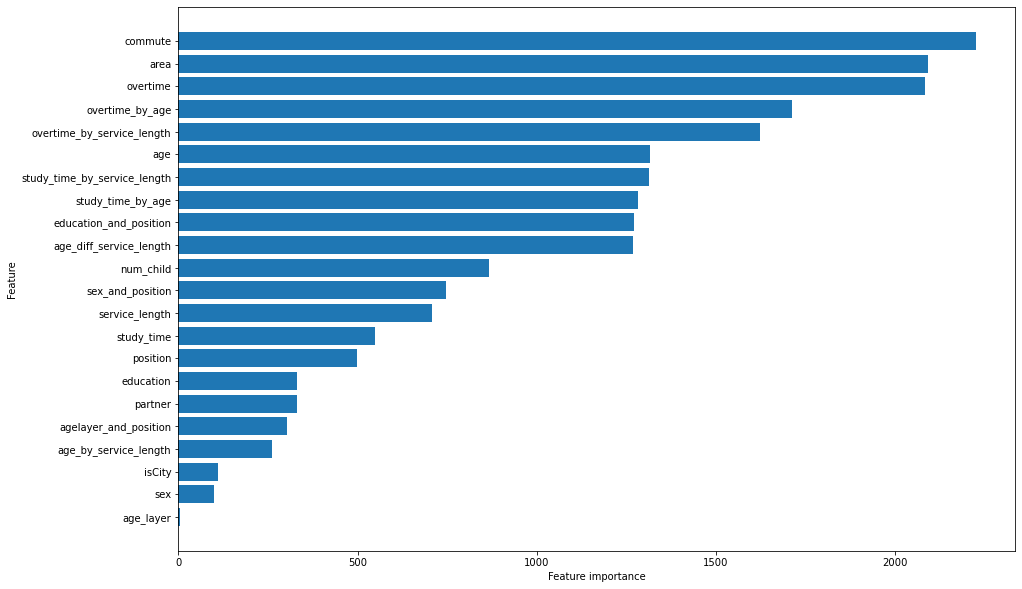

In [36]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(train_pre.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
# f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)
    
plot_feature_importance(df_importance)

In [15]:
submitt = model.predict(test_pre, num_iteration=model.best_iteration)

In [16]:
submitt_data = pd.DataFrame(submitt)
submitt_data.head()

,0
0,526.733655
1,298.890461
2,209.304682
3,180.440664
4,298.338958


In [17]:
submitt_data.shape

(9000, 1)

In [18]:
id_data = pd.DataFrame(test['id'])
submitt_data = pd.concat([id_data,submitt_data], axis=1)
submitt_data

,id,0
0,0,526.733655
1,1,298.890461
2,2,209.304682
3,3,180.440664
4,4,298.338958
...,...,...
8995,8995,330.278109
8996,8996,297.405501
8997,8997,531.500756
8998,8998,141.629257


In [19]:
submitt_data.columns = ['id','y']
submitt_data.to_csv('../output/submit_1.csv', index=False)